In [5]:
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import astropy.units as u
from astropy import constants as const
from scipy import integrate
import diagnostic_lines

warnings.filterwarnings("ignore")

COLOR_STARS = '#e1be6a'
COLOR_AGN = '#40b0a6'

BPASS_solar = pd.read_csv('../data/BPASS_all_solar_models.csv')
AGN_solar = pd.read_csv('../data/AGN_solar.csv')
all_models_with_qs = pd.read_csv('../data/all_models_with_qs.csv', index_col=0)

BPASS_solar = BPASS_solar[BPASS_solar.age <= 8]
all_models_with_qs = all_models_with_qs[(all_models_with_qs.age <= 8)|(all_models_with_qs.age.isna())]

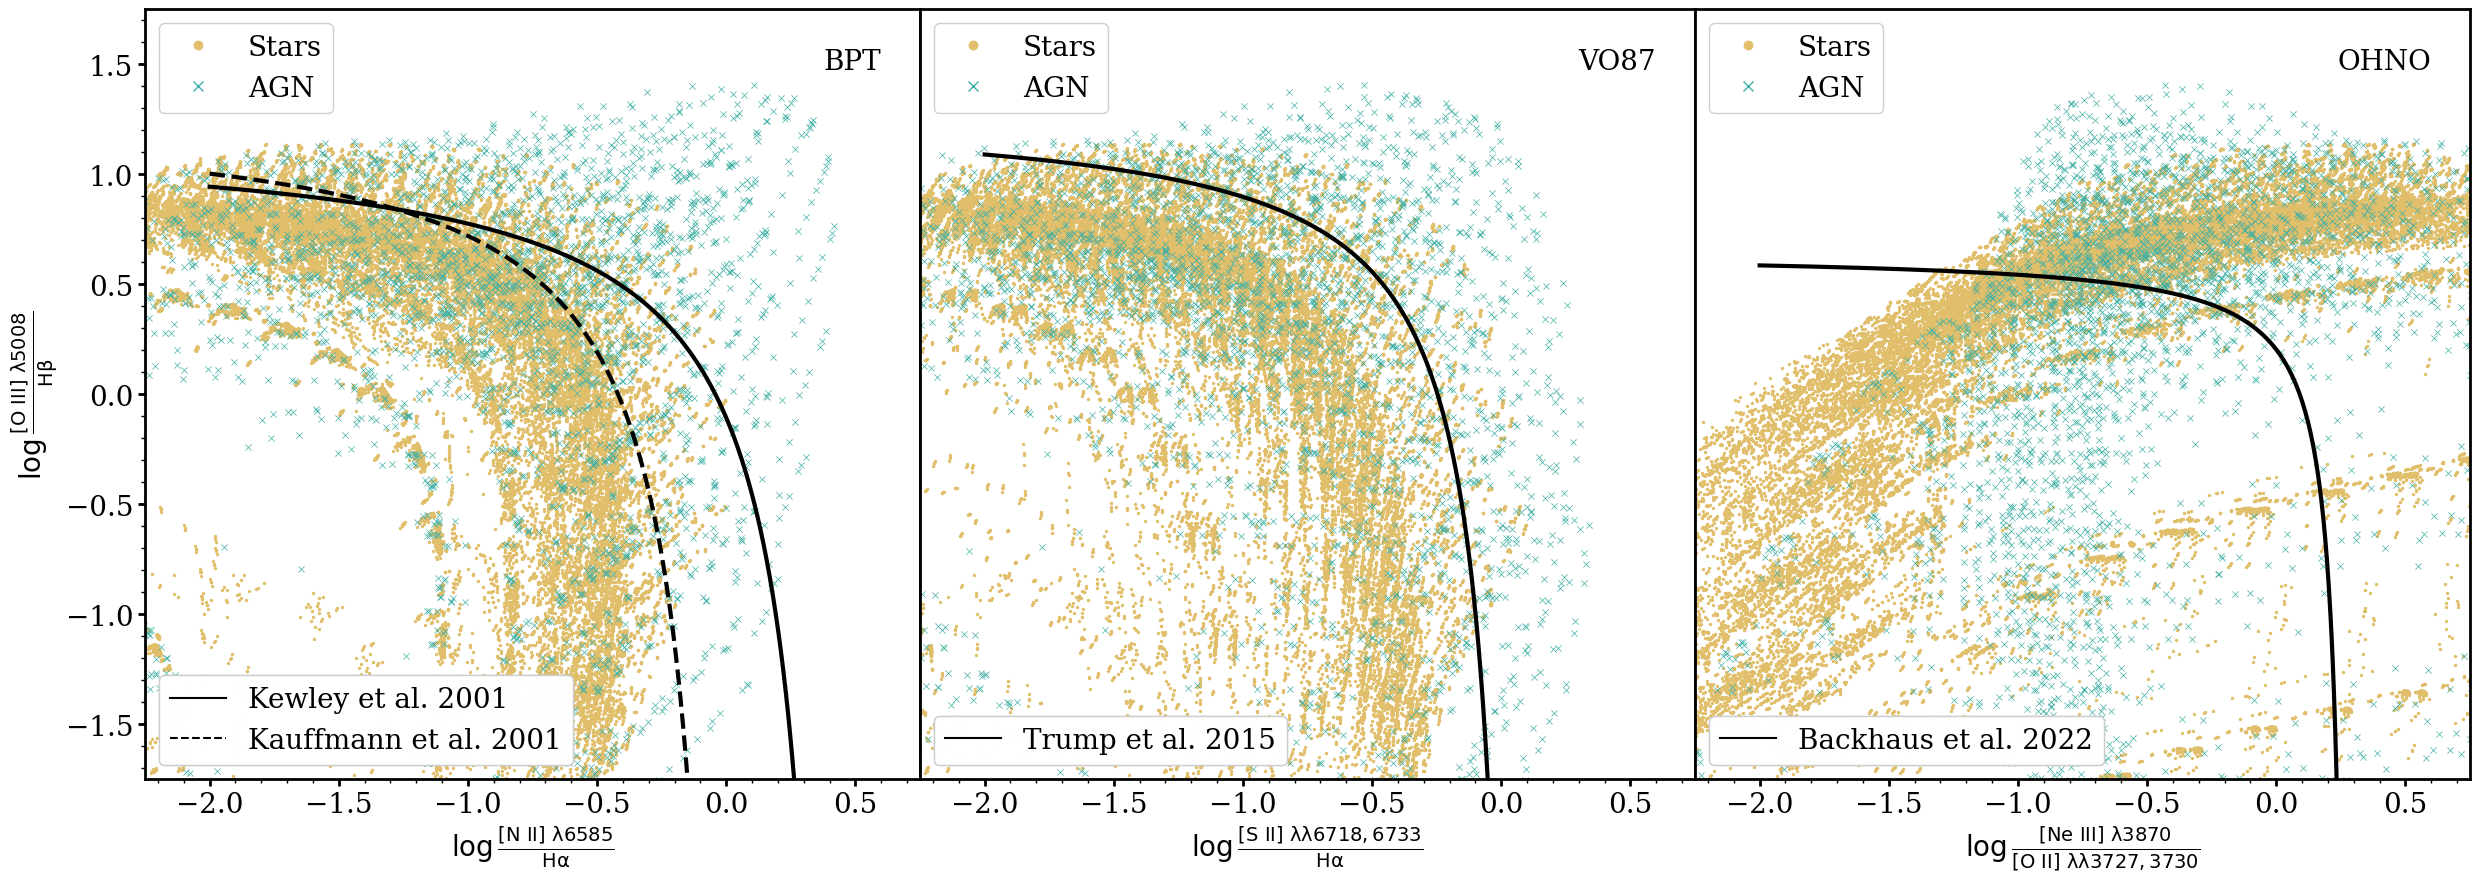

In [4]:
fig = plt.figure(figsize=(32,30))
gs = GridSpec(nrows=30, ncols=32)
gs.update(wspace=0.0, hspace=0.0)

ax = fig.add_subplot(gs[0:10, 0:10])
ax.scatter(np.log10(BPASS_solar['N_2_6583.45A']/BPASS_solar['H_1_6562.81A']), np.log10(BPASS_solar['O_3_5006.84A']/BPASS_solar['H_1_4861.33A']), 
           c=COLOR_STARS, alpha=1.0,  zorder=-9, s=2, rasterized=True)
ax.scatter(np.log10(AGN_solar['N_2_6583.45A']/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=COLOR_AGN, marker='x', alpha=1.0,  zorder=-9, s=20, lw=0.5, rasterized=True)
diagnostic_lines.plot_bpt_kewley_2001(ax, label=True)
diagnostic_lines.plot_bpt_kauffmann_2003(ax, label=True)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel(r'$\log\frac{\rm{[N~II]~\lambda6585}}{\rm{H}\alpha}$')
ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
ax.annotate('BPT', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
legend_elements_points = [Line2D([0], [0], marker='o', color='none', label='Stars', markerfacecolor=COLOR_STARS, markeredgecolor='None', markersize=np.sqrt(50)),
                    Line2D([0], [0], marker='x', color='none', label='AGN', markerfacecolor=COLOR_AGN, markeredgecolor=COLOR_AGN, markersize=np.sqrt(50)),
                    ]      
legend_elements_lines = [Line2D([0], [0], color='k', label='Kewley et al. 2001'),
                         Line2D([0], [0], color='k', linestyle='--', label='Kauffmann et al. 2001')
                    ]       
    
ax.add_artist(ax.legend(handles=legend_elements_points, loc='upper left', framealpha=0.95))
ax.add_artist(ax.legend(handles=legend_elements_lines, loc='lower left', framealpha=0.95))

ax = fig.add_subplot(gs[0:10, 10:20])
ax.scatter(np.log10((BPASS_solar['S_2_6716.44A']+BPASS_solar['S_2_6730.82A'])/BPASS_solar['H_1_6562.81A']), np.log10(BPASS_solar['O_3_5006.84A']/BPASS_solar['H_1_4861.33A']), 
           c=COLOR_STARS, alpha=1.0, label='Stars', zorder=-9, s=2, rasterized=True)
ax.scatter(np.log10((AGN_solar['S_2_6716.44A']+AGN_solar['S_2_6730.82A'])/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=COLOR_AGN, marker='x', alpha=1.0, label='AGN', zorder=-9, s=20, lw=0.5, rasterized=True)
diagnostic_lines.plot_vo87_trump_2015(ax)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel(r'$\log\frac{\rm{[S~II]}~\lambda\lambda6718,6733}{\rm{H}\alpha}$')
ax.tick_params(left=False, labelleft=False, which='both')
ax.annotate('VO87', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
legend_elements_points = [Line2D([0], [0], marker='o', color='none', label='Stars', markerfacecolor=COLOR_STARS, markeredgecolor='None', markersize=np.sqrt(50)),
                    Line2D([0], [0], marker='x', color='none', label='AGN', markerfacecolor=COLOR_AGN, markeredgecolor=COLOR_AGN, markersize=np.sqrt(50)),
                    ]      
legend_elements_lines = [Line2D([0], [0], color='k', label='Trump et al. 2015')
                    ]       
    
ax.add_artist(ax.legend(handles=legend_elements_points, loc='upper left', framealpha=0.95))
ax.add_artist(ax.legend(handles=legend_elements_lines, loc='lower left', framealpha=0.95))

ax = fig.add_subplot(gs[0:10, 20:30])
ax.scatter(np.log10(BPASS_solar['Ne_3_3868.76A']/(BPASS_solar['O_2_3726.03A']+BPASS_solar['O_2_3728.81A'])), np.log10(BPASS_solar['O_3_5006.84A']/BPASS_solar['H_1_4861.33A']), 
           c=COLOR_STARS, alpha=1.0, label='Stars', zorder=-9, s=2, rasterized=True)
ax.scatter(np.log10(AGN_solar['Ne_3_3868.76A']/(AGN_solar['O_2_3726.03A']+AGN_solar['O_2_3728.81A'])), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=COLOR_AGN, marker='x', alpha=1.0, label='AGN', zorder=-9, s=20, lw=0.5, rasterized=True)
diagnostic_lines.plot_ohno_backhaus_2022(ax)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
ax.tick_params(left=False, labelleft=False, which='both')
ax.annotate('OHNO', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

legend_elements_points = [Line2D([0], [0], marker='o', color='none', label='Stars', markerfacecolor=COLOR_STARS, markeredgecolor='None', markersize=np.sqrt(50)),
                    Line2D([0], [0], marker='x', color='none', label='AGN', markerfacecolor=COLOR_AGN, markeredgecolor=COLOR_AGN, markersize=np.sqrt(50)),
                    ]      
legend_elements_lines = [Line2D([0], [0], color='k', label='Backhaus et al. 2022')
                    ]       
    
ax.add_artist(ax.legend(handles=legend_elements_points, loc='upper left', framealpha=0.95))
ax.add_artist(ax.legend(handles=legend_elements_lines, loc='lower left', framealpha=0.95))

plt.savefig('../figures/diagnostics_model_threepanel.pdf', bbox_inches='tight')
plt.show()

In [4]:
def log_likelihood(data, model, uncertainty):
    return -0.5 * (data - model) ** 2 / uncertainty**2

OIII_Hb_data = np.logspace(-1.5, 1.5, 7)
NII_Ha_data = np.logspace(-2, 0.5, 6)

bpt_inference = pd.DataFrame(index=pd.MultiIndex.from_product([OIII_Hb_data, NII_Ha_data, all_models_with_qs.index], names=['data_OIII_Hb', 'data_NII_Ha', 'sed'])).assign(
    model_OIII = lambda x: [all_models_with_qs.at[sed, 'O_3_5006.84A']+1e-9 for sed in x.index.get_level_values('sed')],
    model_Hb = lambda x: [all_models_with_qs.at[sed, 'H_1_4861.33A']+1e-9 for sed in x.index.get_level_values('sed')],
    model_NII = lambda x: [all_models_with_qs.at[sed, 'N_2_6583.45A']+1e-9 for sed in x.index.get_level_values('sed')],
    model_Ha = lambda x: [all_models_with_qs.at[sed, 'H_1_6562.81A']+1e-9 for sed in x.index.get_level_values('sed')], 
    logU = lambda x: [all_models_with_qs.at[sed, 'logU'] for sed in x.index.get_level_values('sed')],
    zgas = lambda x: [all_models_with_qs.at[sed, 'zgas'] for sed in x.index.get_level_values('sed')],
    hden = lambda x: [all_models_with_qs.at[sed, 'hden'] for sed in x.index.get_level_values('sed')],
    Q_total = lambda x: [all_models_with_qs.at[sed, 'Q_total'] for sed in x.index.get_level_values('sed')],
    Q_low = lambda x: [all_models_with_qs.at[sed, 'Q_low'] for sed in x.index.get_level_values('sed')],
    Q_intermediate = lambda x: [all_models_with_qs.at[sed, 'Q_intermediate'] for sed in x.index.get_level_values('sed')],
    Q_high = lambda x: [all_models_with_qs.at[sed, 'Q_high'] for sed in x.index.get_level_values('sed')],
    Q_very_high = lambda x: [all_models_with_qs.at[sed, 'Q_very_high'] for sed in x.index.get_level_values('sed')]
).reset_index().assign(
    model_OIII_Hb = lambda x: x.model_OIII/x.model_Hb,
    log_model_OIII_Hb = lambda x: np.log10(x.model_OIII_Hb),
    model_NII_Ha = lambda x: x.model_NII/x.model_Ha,
    log_model_NII_Ha = lambda x: np.log10(x.model_NII_Ha),
    log_likelihood_OIII_Hb = lambda x: log_likelihood(data=np.log10(x.data_OIII_Hb), model=x.log_model_OIII_Hb, uncertainty=0.25),
    log_likelihood_NII_Ha = lambda x: log_likelihood(data=np.log10(x.data_NII_Ha), model=x.log_model_NII_Ha, uncertainty=0.25), 
    likelihood_BPT = lambda x: np.exp(x.log_likelihood_OIII_Hb+x.log_likelihood_NII_Ha),
    likelihood_BPT_norm = lambda x: x.likelihood_BPT/x.groupby(['data_NII_Ha', 'data_OIII_Hb'])['likelihood_BPT'].transform('sum'),
    likelihood_weighted_logU = lambda x: x.logU*x.likelihood_BPT_norm,
    likelihood_weighted_zgas = lambda x: x.zgas*x.likelihood_BPT_norm,
    likelihood_weighted_Q_total = lambda x: x.Q_total*x.likelihood_BPT_norm,
    likelihood_weighted_Q_low = lambda x: x.Q_low*x.likelihood_BPT_norm,
    likelihood_weighted_Q_intermediate = lambda x: x.Q_intermediate*x.likelihood_BPT_norm,
    likelihood_weighted_Q_high = lambda x: x.Q_high*x.likelihood_BPT_norm,
    likelihood_weighted_Q_very_high = lambda x: x.Q_very_high*x.likelihood_BPT_norm,
    likelihood_weighted_Q_intermediate_Q_low = lambda x: (x.Q_intermediate/x.Q_low)*x.likelihood_BPT_norm,
    likelihood_weighted_Q_high_Q_intermediate = lambda x:(x.Q_high/x.Q_intermediate)*x.likelihood_BPT_norm,
    likelihood_weighted_Q_high_Q_low = lambda x: (x.Q_high/x.Q_low)*x.likelihood_BPT_norm,
    likelihood_weighted_Q_very_high_Q_low = lambda x: (x.Q_very_high/x.Q_low)*x.likelihood_BPT_norm,
    likelihood_weighted_Q_very_high_Q_intermediate = lambda x: (x.Q_very_high/x.Q_intermediate)*x.likelihood_BPT_norm,
    likelihood_weighted_Q_very_high_Q_high = lambda x: (x.Q_very_high/x.Q_high)*x.likelihood_BPT_norm,
)

bpt_groupby = bpt_inference.drop('sed', axis=1).groupby(by=['data_NII_Ha', 'data_OIII_Hb']).sum().reset_index()
bpt_groupby_std = bpt_inference.drop('sed', axis=1).groupby(by=['data_NII_Ha', 'data_OIII_Hb']).std().reset_index()

bpt_groupby_logU = bpt_inference.drop('sed', axis=1).groupby(by=['data_NII_Ha', 'data_OIII_Hb', 'logU']).sum().reset_index()
bpt_groupby_zgas = bpt_inference.drop('sed', axis=1).groupby(by=['data_NII_Ha', 'data_OIII_Hb', 'zgas']).sum().reset_index()

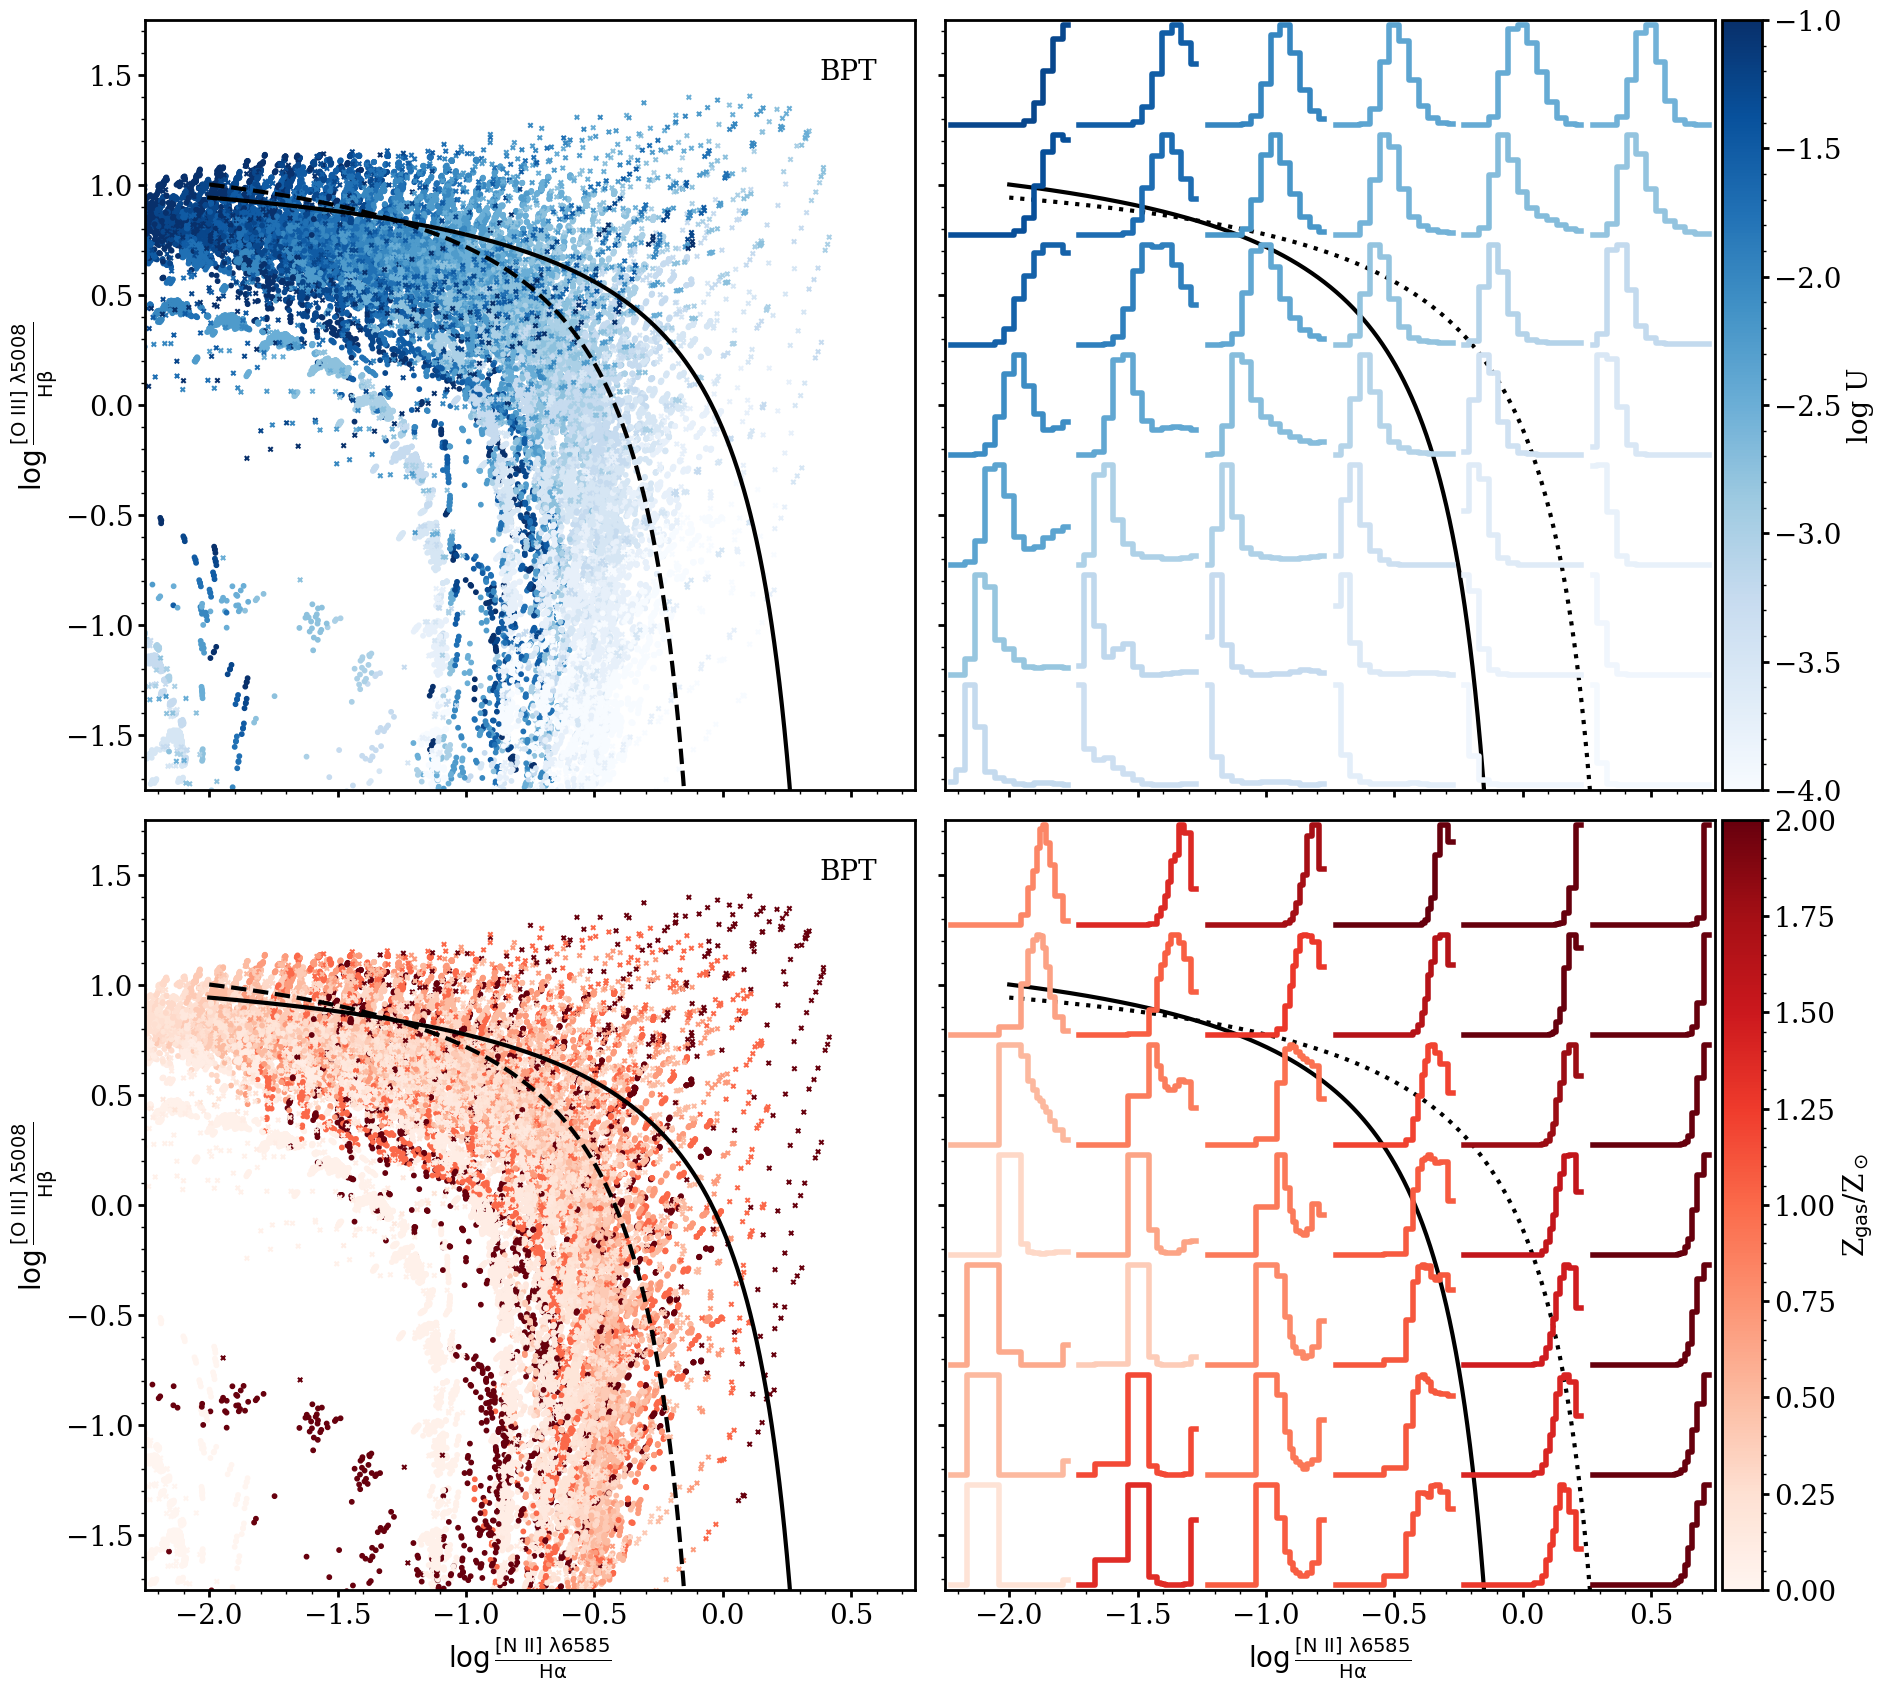

In [5]:
fig = plt.figure(figsize=(16,16), layout='tight')
subfigs = fig.subfigures(2, 2, wspace=0.0, hspace=0.0)

ax = subfigs[0,0].subplots(1,1)
colorbar_data = ax.scatter(np.log10(BPASS_solar['N_2_6583.45A']/BPASS_solar['H_1_6562.81A']), np.log10(BPASS_solar['O_3_5006.84A']/BPASS_solar['H_1_4861.33A']), 
           c=BPASS_solar['logU'], cmap='Blues', vmin=-4, vmax=-1, zorder=-9, s=10, rasterized=True)
colorbar_data = ax.scatter(np.log10(AGN_solar['N_2_6583.45A']/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['logU'], cmap='Blues', vmin=-4, vmax=-1, marker='x', zorder=-9, s=10, rasterized=True)
diagnostic_lines.plot_bpt_kewley_2001(ax)
diagnostic_lines.plot_bpt_kauffmann_2003(ax)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
ax.annotate('BPT', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
ax.tick_params(labelbottom=False)

ax = subfigs[1,0].subplots(1,1)
colorbar_data = ax.scatter(np.log10(BPASS_solar['N_2_6583.45A']/BPASS_solar['H_1_6562.81A']), np.log10(BPASS_solar['O_3_5006.84A']/BPASS_solar['H_1_4861.33A']), 
           c=BPASS_solar['zgas'], cmap='Reds', vmin=0, vmax=2, zorder=-9, s=10, rasterized=True)
colorbar_data = ax.scatter(np.log10(AGN_solar['N_2_6583.45A']/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['zgas'], cmap='Reds', vmin=0, vmax=2, marker='x', zorder=-9, s=10, rasterized=True)
diagnostic_lines.plot_bpt_kewley_2001(ax)
diagnostic_lines.plot_bpt_kauffmann_2003(ax)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel(r'$\log\frac{\rm{[N~II]~\lambda6585}}{\rm{H}\alpha}$')
ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
ax.annotate('BPT', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = subfigs[0,1].subplots(1,1)
x = np.linspace(-2,0.46, 1000)
ax.plot(x, diagnostic_lines.bpt_kewley_2001(x), c='black', ls=':', lw=3, label='Kewley et al. 2001', zorder=-9)
x = np.linspace(-2,0.04, 1000)
ax.plot(x, diagnostic_lines.bpt_kauffmann_2003(x), c='black', ls='-', lw=3, label='Kauffmann et al. 2003', zorder=-9)

ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.tick_params(labelleft=False, labelbottom=False)


outer_grid = subfigs[0,1].add_gridspec(7, 6, wspace=0, hspace=0)
axs = outer_grid.subplots()
for (i, j), ax in np.ndenumerate(axs):
    nii_ha_index = j
    oiii_hb_index = 6-i
    slice_condition = (bpt_groupby_logU['data_NII_Ha'] == bpt_groupby_logU['data_NII_Ha'].unique()[nii_ha_index])&(bpt_groupby_logU['data_OIII_Hb'] == bpt_groupby_logU['data_OIII_Hb'].unique()[oiii_hb_index])
    slice_condition_color = (bpt_groupby['data_NII_Ha'] == bpt_groupby_logU['data_NII_Ha'].unique()[nii_ha_index])&(bpt_groupby['data_OIII_Hb'] == bpt_groupby_logU['data_OIII_Hb'].unique()[oiii_hb_index])
    posterior_mean = bpt_groupby['likelihood_weighted_logU'][slice_condition_color]
    slice_color = plt.cm.Blues((posterior_mean+4)/3)
    bpt_point = bpt_groupby_logU[slice_condition]
    ax.step(bpt_point['logU'], bpt_point['likelihood_BPT_norm'], where='mid', lw=4, c=slice_color)
    ax.set(xticks=[], yticks=[])
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_facecolor('None')

ax = subfigs[0,1].add_axes([0.99, 0.019, 0.05, 0.9625])
cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', cmap='Blues', norm=mpl.colors.Normalize(vmin=-4, vmax=-1))
cb.set_label('log U')

ax = subfigs[1,1].subplots(1,1)
x = np.linspace(-2,0.46, 1000)
ax.plot(x, diagnostic_lines.bpt_kewley_2001(x), c='black', ls=':', lw=3, label='Kewley et al. 2001', zorder=-9)
x = np.linspace(-2,0.04, 1000)
ax.plot(x, diagnostic_lines.bpt_kauffmann_2003(x), c='black', ls='-', lw=3, label='Kauffmann et al. 2003', zorder=-9)

ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel(r'$\log\frac{\rm{[N~II]~\lambda6585}}{\rm{H}\alpha}$')
ax.tick_params(labelleft=False)

outer_grid = subfigs[1,1].add_gridspec(7, 6, wspace=0, hspace=0)
axs = outer_grid.subplots()
for (i, j), ax in np.ndenumerate(axs):
    nii_ha_index = j
    oiii_hb_index = 6-i
    slice_condition = (bpt_groupby_zgas['data_NII_Ha'] == bpt_groupby_zgas['data_NII_Ha'].unique()[nii_ha_index])&(bpt_groupby_zgas['data_OIII_Hb'] == bpt_groupby_zgas['data_OIII_Hb'].unique()[oiii_hb_index])
    slice_condition_color = (bpt_groupby['data_NII_Ha'] == bpt_groupby_zgas['data_NII_Ha'].unique()[nii_ha_index])&(bpt_groupby['data_OIII_Hb'] == bpt_groupby_zgas['data_OIII_Hb'].unique()[oiii_hb_index])
    posterior_mean = bpt_groupby['likelihood_weighted_zgas'][slice_condition_color]
    slice_color = plt.cm.Reds(posterior_mean)
    bpt_point = bpt_groupby_zgas[slice_condition]
    ax.step(np.log10(bpt_point['zgas']), bpt_point['likelihood_BPT_norm'], where='mid', lw=4, c=slice_color)
    ax.set(xticks=[], yticks=[])
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_facecolor('None')

ax = subfigs[1,1].add_axes([0.99, 0.019, 0.05, 0.9625])
cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', cmap='Reds', norm=mpl.colors.Normalize(vmin=0, vmax=2))
cb.set_label(r'Z$_{\rm{gas}}$/Z$_\odot$')

plt.savefig('../figures/BPT_logU_logZ.pdf', bbox_inches='tight')
plt.show()

In [6]:
OIII_Hb_data = np.logspace(-1.5, 1.5, 7)
SII_Ha_data = np.logspace(-2, 0.5, 6)

vo87_inference = pd.DataFrame(index=pd.MultiIndex.from_product([OIII_Hb_data, SII_Ha_data, all_models_with_qs.index], names=['data_OIII_Hb', 'data_SII_Ha', 'sed'])).assign(
    model_OIII = lambda x: [all_models_with_qs.at[sed, 'O_3_5006.84A']+1e-9 for sed in x.index.get_level_values('sed')],
    model_Hb = lambda x: [all_models_with_qs.at[sed, 'H_1_4861.33A']+1e-9 for sed in x.index.get_level_values('sed')],
    model_SII = lambda x: [all_models_with_qs.at[sed, 'S_2_6716.44A']+all_models_with_qs.at[sed, 'S_2_6730.82A']+1e-9 for sed in x.index.get_level_values('sed')],
    model_Ha = lambda x: [all_models_with_qs.at[sed, 'H_1_6562.81A']+1e-9 for sed in x.index.get_level_values('sed')], 
    logU = lambda x: [all_models_with_qs.at[sed, 'logU'] for sed in x.index.get_level_values('sed')],
    zgas = lambda x: [all_models_with_qs.at[sed, 'zgas'] for sed in x.index.get_level_values('sed')],
    hden = lambda x: [all_models_with_qs.at[sed, 'hden'] for sed in x.index.get_level_values('sed')],
    Q_total = lambda x: [all_models_with_qs.at[sed, 'Q_total'] for sed in x.index.get_level_values('sed')],
    Q_low = lambda x: [all_models_with_qs.at[sed, 'Q_low'] for sed in x.index.get_level_values('sed')],
    Q_intermediate = lambda x: [all_models_with_qs.at[sed, 'Q_intermediate'] for sed in x.index.get_level_values('sed')],
    Q_high = lambda x: [all_models_with_qs.at[sed, 'Q_high'] for sed in x.index.get_level_values('sed')],
    Q_very_high = lambda x: [all_models_with_qs.at[sed, 'Q_very_high'] for sed in x.index.get_level_values('sed')]
).reset_index().assign(
    model_OIII_Hb = lambda x: x.model_OIII/x.model_Hb,
    log_model_OIII_Hb = lambda x: np.log10(x.model_OIII_Hb),
    model_SII_Ha = lambda x: x.model_SII/x.model_Ha,
    log_model_SII_Ha = lambda x: np.log10(x.model_SII_Ha),
    log_likelihood_OIII_Hb = lambda x: log_likelihood(data=np.log10(x.data_OIII_Hb), model=x.log_model_OIII_Hb, uncertainty=0.25),
    log_likelihood_SII_Ha = lambda x: log_likelihood(data=np.log10(x.data_SII_Ha), model=x.log_model_SII_Ha, uncertainty=0.25), 
    likelihood_vo87 = lambda x: np.exp(x.log_likelihood_OIII_Hb+x.log_likelihood_SII_Ha),
    likelihood_vo87_norm = lambda x: x.likelihood_vo87/x.groupby(['data_SII_Ha', 'data_OIII_Hb'])['likelihood_vo87'].transform('sum'),
    likelihood_weighted_logU = lambda x: x.logU*x.likelihood_vo87_norm,
    likelihood_weighted_zgas = lambda x: x.zgas*x.likelihood_vo87_norm,
    likelihood_weighted_Q_total = lambda x: x.Q_total*x.likelihood_vo87_norm,
    likelihood_weighted_Q_low = lambda x: x.Q_low*x.likelihood_vo87_norm,
    likelihood_weighted_Q_intermediate = lambda x: x.Q_intermediate*x.likelihood_vo87_norm,
    likelihood_weighted_Q_high = lambda x: x.Q_high*x.likelihood_vo87_norm,
    likelihood_weighted_Q_very_high = lambda x: x.Q_very_high*x.likelihood_vo87_norm,
    likelihood_weighted_Q_intermediate_Q_low = lambda x: (x.Q_intermediate/x.Q_low)*x.likelihood_vo87_norm,
    likelihood_weighted_Q_high_Q_intermediate = lambda x:(x.Q_high/x.Q_intermediate)*x.likelihood_vo87_norm,
    likelihood_weighted_Q_high_Q_low = lambda x: (x.Q_high/x.Q_low)*x.likelihood_vo87_norm,
    likelihood_weighted_Q_very_high_Q_low = lambda x: (x.Q_very_high/x.Q_low)*x.likelihood_vo87_norm,
    likelihood_weighted_Q_very_high_Q_intermediate = lambda x: (x.Q_very_high/x.Q_intermediate)*x.likelihood_vo87_norm,
    likelihood_weighted_Q_very_high_Q_high = lambda x: (x.Q_very_high/x.Q_high)*x.likelihood_vo87_norm,
)

vo87_groupby = vo87_inference.drop('sed', axis=1).groupby(by=['data_SII_Ha', 'data_OIII_Hb']).sum().reset_index()
vo87_groupby_std = vo87_inference.drop('sed', axis=1).groupby(by=['data_SII_Ha', 'data_OIII_Hb']).std().reset_index()

vo87_groupby_logU = vo87_inference.drop('sed', axis=1).groupby(by=['data_SII_Ha', 'data_OIII_Hb', 'logU']).sum().reset_index()
vo87_groupby_zgas = vo87_inference.drop('sed', axis=1).groupby(by=['data_SII_Ha', 'data_OIII_Hb', 'zgas']).sum().reset_index()



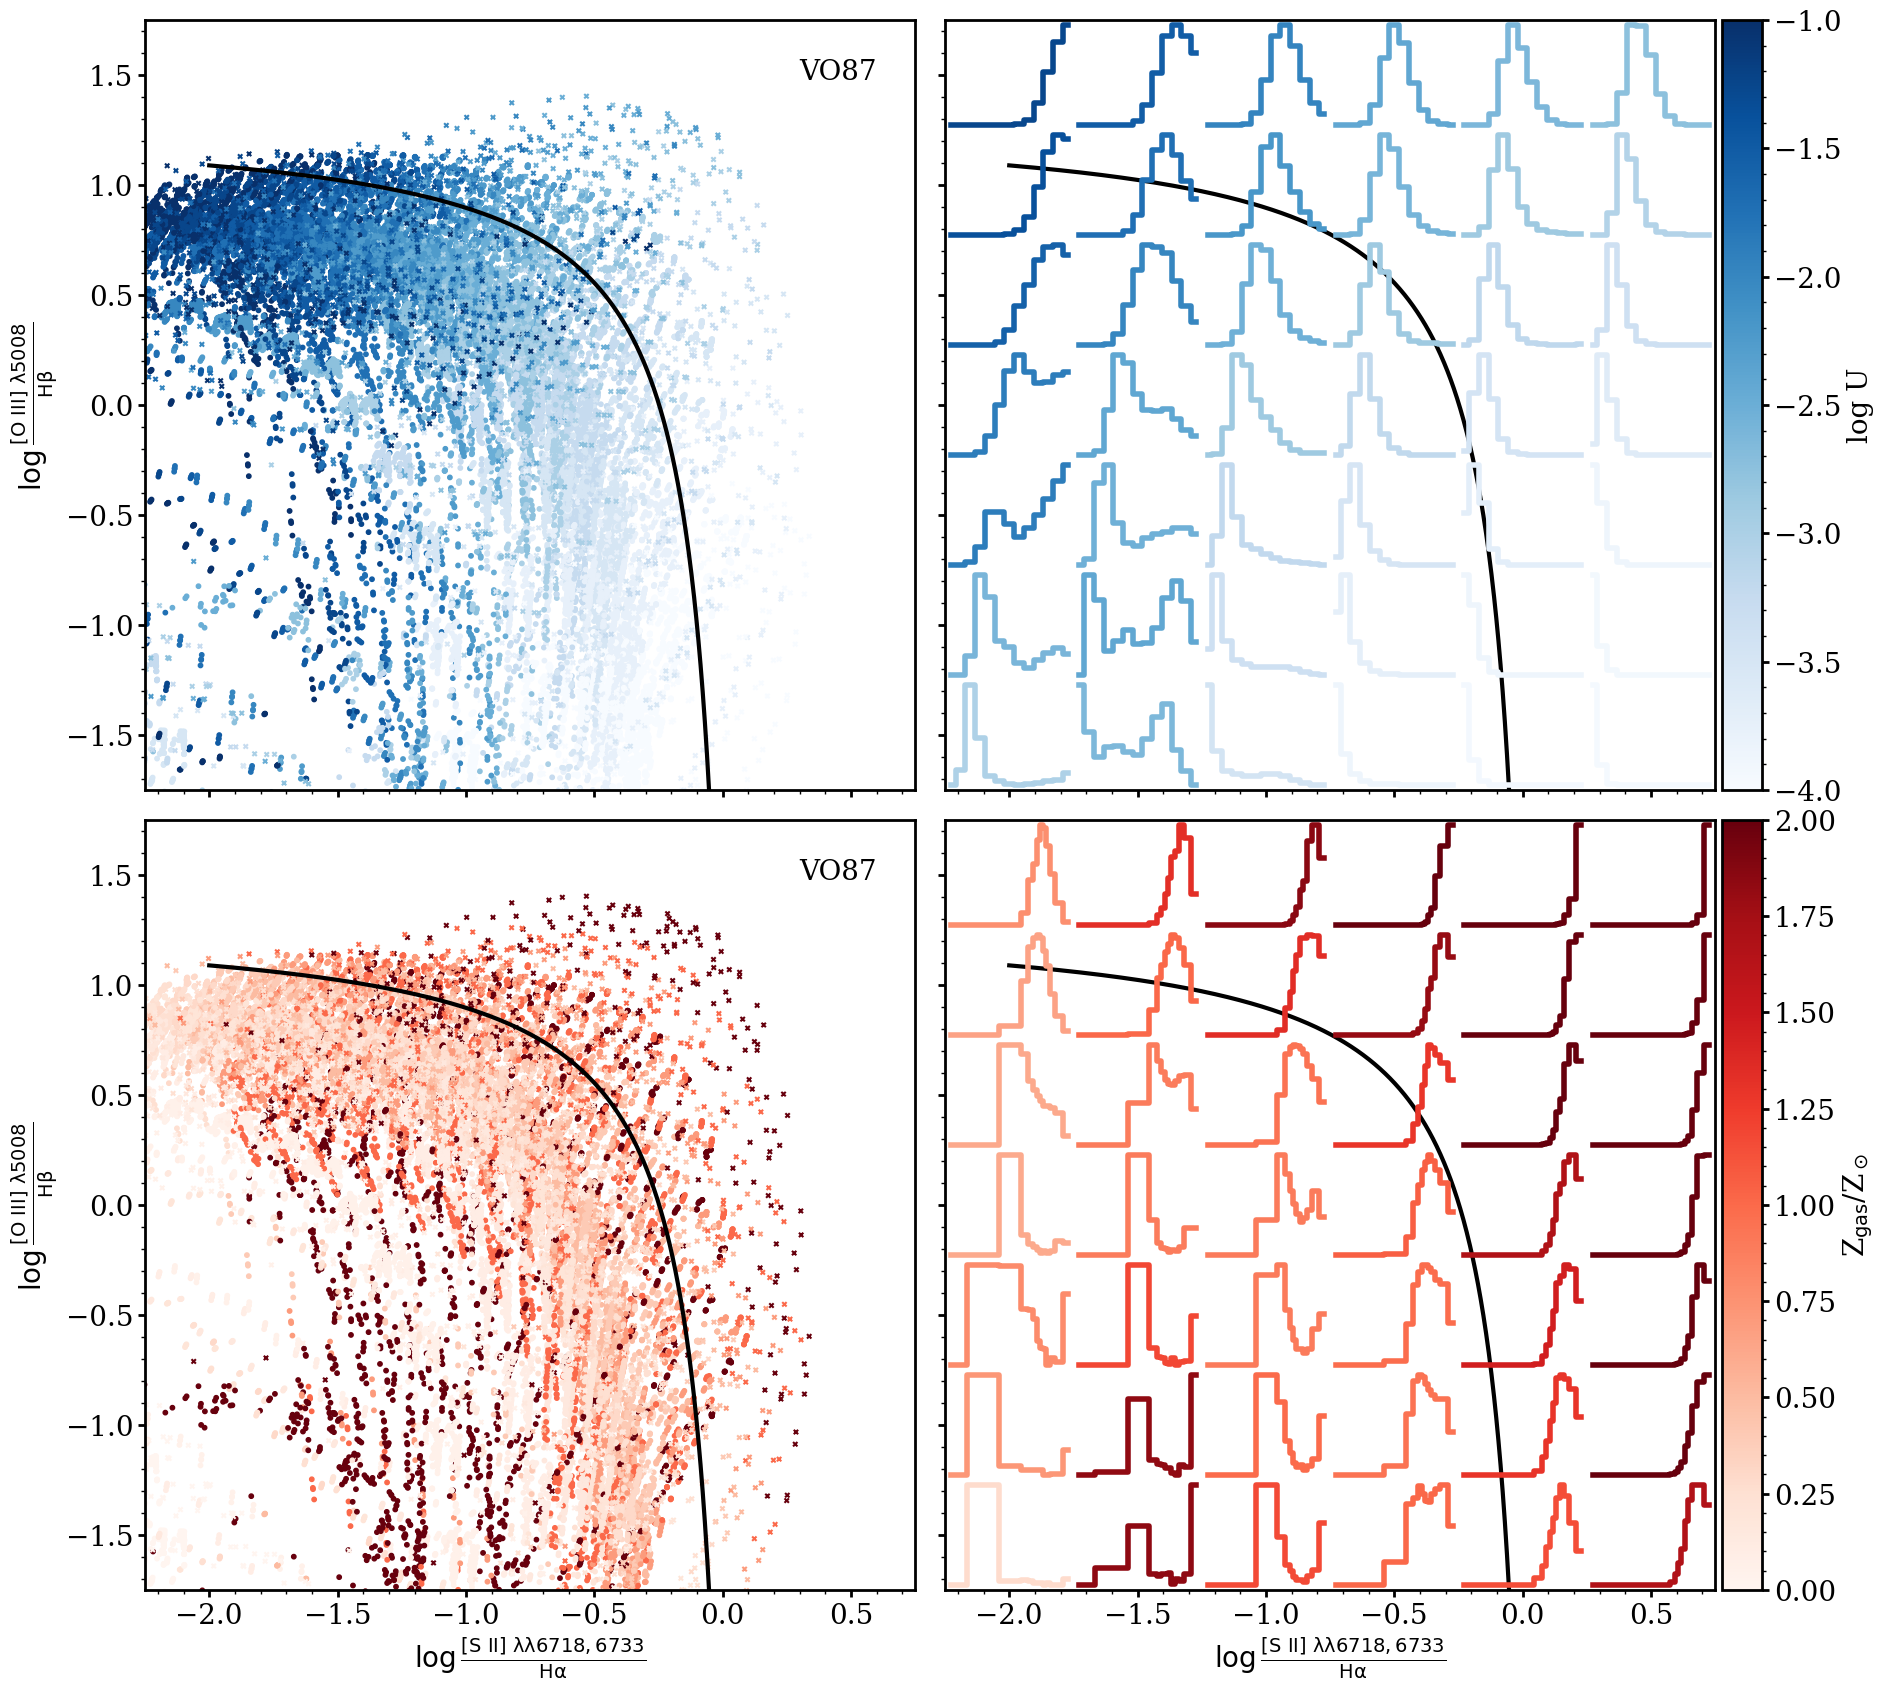

In [23]:
fig = plt.figure(figsize=(16,16), layout='tight')
subfigs = fig.subfigures(2, 2, wspace=0.0, hspace=0.0)

ax = subfigs[0,0].subplots(1,1)
ax.scatter(np.log10((BPASS_solar['S_2_6716.44A']+BPASS_solar['S_2_6730.82A'])/BPASS_solar['H_1_6562.81A']), np.log10(BPASS_solar['O_3_5006.84A']/BPASS_solar['H_1_4861.33A']), 
           c=BPASS_solar['logU'], cmap='Blues', vmin=-4, vmax=-1, zorder=-9, s=10, rasterized=True)
ax.scatter(np.log10((AGN_solar['S_2_6716.44A']+AGN_solar['S_2_6730.82A'])/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['logU'], cmap='Blues', vmin=-4, vmax=-1, marker='x', zorder=-9, s=10, rasterized=True)
diagnostic_lines.plot_vo87_trump_2015(ax)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
ax.annotate('VO87', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
ax.tick_params(labelbottom=False)

ax = subfigs[1,0].subplots(1,1)
ax.scatter(np.log10((BPASS_solar['S_2_6716.44A']+BPASS_solar['S_2_6730.82A'])/BPASS_solar['H_1_6562.81A']), np.log10(BPASS_solar['O_3_5006.84A']/BPASS_solar['H_1_4861.33A']), 
           c=BPASS_solar['zgas'], cmap='Reds', vmin=0, vmax=2, zorder=-9, s=10, rasterized=True)
ax.scatter(np.log10((AGN_solar['S_2_6716.44A']+AGN_solar['S_2_6730.82A'])/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['zgas'], cmap='Reds', vmin=0, vmax=2, marker='x', zorder=-9, s=10, rasterized=True)
diagnostic_lines.plot_vo87_trump_2015(ax)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
ax.set_xlabel(r'$\log\frac{\rm{[S~II]}~\lambda\lambda6718,6733}{\rm{H}\alpha}$')
ax.annotate('VO87', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')


ax = subfigs[0,1].subplots(1,1)
x = np.linspace(-2,0.09, 1000)
ax.plot(x, diagnostic_lines.vo87_trump_2015(x), c='black', ls='-', lw=3, label= 'Trump et al. 2015', zorder=-9)

ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.tick_params(labelleft=False, labelbottom=False)

outer_grid = subfigs[0,1].add_gridspec(7, 6, wspace=0, hspace=0)
axs = outer_grid.subplots()
for (i, j), ax in np.ndenumerate(axs):
    Sii_ha_index = j
    oiii_hb_index = 6-i
    slice_condition = (vo87_groupby_logU['data_SII_Ha'] == vo87_groupby_logU['data_SII_Ha'].unique()[Sii_ha_index])&(vo87_groupby_logU['data_OIII_Hb'] == vo87_groupby_logU['data_OIII_Hb'].unique()[oiii_hb_index])
    slice_condition_color = (vo87_groupby['data_SII_Ha'] == vo87_groupby_logU['data_SII_Ha'].unique()[Sii_ha_index])&(vo87_groupby['data_OIII_Hb'] == vo87_groupby_logU['data_OIII_Hb'].unique()[oiii_hb_index])
    posterior_mean = vo87_groupby['likelihood_weighted_logU'][slice_condition_color]
    slice_color = plt.cm.Blues((posterior_mean+4)/3)
    vo87_point = vo87_groupby_logU[slice_condition]
    ax.step(vo87_point['logU'], vo87_point['likelihood_vo87_norm'], where='mid', lw=4, c=slice_color)
    ax.set(xticks=[], yticks=[])
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_facecolor('None')
    
ax = subfigs[0,1].add_axes([0.99, 0.019, 0.05, 0.9625])
cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', cmap='Blues', norm=mpl.colors.Normalize(vmin=-4, vmax=-1))
cb.set_label('log U')

ax = subfigs[1,1].subplots(1,1)
x = np.linspace(-2,0.09, 1000)
ax.plot(x, diagnostic_lines.vo87_trump_2015(x), c='black', ls='-', lw=3, label= 'Trump et al. 2015', zorder=-9)

ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel(r'$\log\frac{\rm{[S~II]}~\lambda\lambda6718,6733}{\rm{H}\alpha}$')
ax.tick_params(labelleft=False)

outer_grid = subfigs[1,1].add_gridspec(7, 6, wspace=0, hspace=0)
axs = outer_grid.subplots()
for (i, j), ax in np.ndenumerate(axs):
    Sii_ha_index = j
    oiii_hb_index = 6-i
    slice_condition = (vo87_groupby_zgas['data_SII_Ha'] == vo87_groupby_zgas['data_SII_Ha'].unique()[Sii_ha_index])&(vo87_groupby_zgas['data_OIII_Hb'] == vo87_groupby_zgas['data_OIII_Hb'].unique()[oiii_hb_index])
    slice_condition_color = (vo87_groupby['data_SII_Ha'] == vo87_groupby_zgas['data_SII_Ha'].unique()[Sii_ha_index])&(vo87_groupby['data_OIII_Hb'] == vo87_groupby_zgas['data_OIII_Hb'].unique()[oiii_hb_index])
    posterior_mean = vo87_groupby['likelihood_weighted_zgas'][slice_condition_color]
    slice_color = plt.cm.Reds(posterior_mean)
    vo87_point = vo87_groupby_zgas[slice_condition]
    ax.step(np.log10(vo87_point['zgas']), vo87_point['likelihood_vo87_norm'], where='mid', lw=4, c=slice_color)
    ax.set(xticks=[], yticks=[])
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_facecolor('None')

ax = subfigs[1,1].add_axes([0.99, 0.019, 0.05, 0.9625])
cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', cmap='Reds', norm=mpl.colors.Normalize(vmin=0, vmax=2))
cb.set_label(r'Z$_{\rm{gas}}$/Z$_\odot$')

plt.savefig('../figures/VO87_logU_logZ.pdf', bbox_inches='tight')
plt.show()

In [8]:
OIII_Hb_data = np.logspace(-1.5, 1.5, 7)
NeIII_OII_data = np.logspace(-1.5, 1.0, 6)

ohno_inference = pd.DataFrame(index=pd.MultiIndex.from_product([OIII_Hb_data, NeIII_OII_data, all_models_with_qs.index], names=['data_OIII_Hb', 'data_NeIII_OII', 'sed'])).assign(
    model_OIII = lambda x: [all_models_with_qs.at[sed, 'O_3_5006.84A']+1e-9 for sed in x.index.get_level_values('sed')],
    model_Hb = lambda x: [all_models_with_qs.at[sed, 'H_1_4861.33A']+1e-9 for sed in x.index.get_level_values('sed')],
    model_NeIII = lambda x: [all_models_with_qs.at[sed, 'Ne_3_3868.76A']+1e-9 for sed in x.index.get_level_values('sed')],
    model_OII = lambda x: [all_models_with_qs.at[sed, 'O_2_3726.03A']+all_models_with_qs.at[sed, 'O_2_3728.81A']+1e-9 for sed in x.index.get_level_values('sed')], 
    logU = lambda x: [all_models_with_qs.at[sed, 'logU'] for sed in x.index.get_level_values('sed')],
    zgas = lambda x: [all_models_with_qs.at[sed, 'zgas'] for sed in x.index.get_level_values('sed')],
    hden = lambda x: [all_models_with_qs.at[sed, 'hden'] for sed in x.index.get_level_values('sed')],
    Q_total = lambda x: [all_models_with_qs.at[sed, 'Q_total'] for sed in x.index.get_level_values('sed')],
    Q_low = lambda x: [all_models_with_qs.at[sed, 'Q_low'] for sed in x.index.get_level_values('sed')],
    Q_intermediate = lambda x: [all_models_with_qs.at[sed, 'Q_intermediate'] for sed in x.index.get_level_values('sed')],
    Q_high = lambda x: [all_models_with_qs.at[sed, 'Q_high'] for sed in x.index.get_level_values('sed')],
    Q_very_high = lambda x: [all_models_with_qs.at[sed, 'Q_very_high'] for sed in x.index.get_level_values('sed')]
).reset_index().assign(
    model_OIII_Hb = lambda x: x.model_OIII/x.model_Hb,
    log_model_OIII_Hb = lambda x: np.log10(x.model_OIII_Hb),
    model_NeIII_OII = lambda x: x.model_NeIII/x.model_OII,
    log_model_NeIII_OII = lambda x: np.log10(x.model_NeIII_OII),
    log_likelihood_OIII_Hb = lambda x: log_likelihood(data=np.log10(x.data_OIII_Hb), model=x.log_model_OIII_Hb, uncertainty=0.25),
    log_likelihood_NeIII_OII = lambda x: log_likelihood(data=np.log10(x.data_NeIII_OII), model=x.log_model_NeIII_OII, uncertainty=0.25), 
    likelihood_ohno = lambda x: np.exp(x.log_likelihood_OIII_Hb+x.log_likelihood_NeIII_OII),
    likelihood_ohno_norm = lambda x: x.likelihood_ohno/x.groupby(['data_NeIII_OII', 'data_OIII_Hb'])['likelihood_ohno'].transform('sum'),
    likelihood_weighted_logU = lambda x: x.logU*x.likelihood_ohno_norm,
    likelihood_weighted_zgas = lambda x: x.zgas*x.likelihood_ohno_norm,
    likelihood_weighted_Q_total = lambda x: x.Q_total*x.likelihood_ohno_norm,
    likelihood_weighted_Q_low = lambda x: x.Q_low*x.likelihood_ohno_norm,
    likelihood_weighted_Q_intermediate = lambda x: x.Q_intermediate*x.likelihood_ohno_norm,
    likelihood_weighted_Q_high = lambda x: x.Q_high*x.likelihood_ohno_norm,
    likelihood_weighted_Q_very_high = lambda x: x.Q_very_high*x.likelihood_ohno_norm,
    likelihood_weighted_Q_intermediate_Q_low = lambda x: (x.Q_intermediate/x.Q_low)*x.likelihood_ohno_norm,
    likelihood_weighted_Q_high_Q_intermediate = lambda x:(x.Q_high/x.Q_intermediate)*x.likelihood_ohno_norm,
    likelihood_weighted_Q_high_Q_low = lambda x: (x.Q_high/x.Q_low)*x.likelihood_ohno_norm,
    likelihood_weighted_Q_very_high_Q_low = lambda x: (x.Q_very_high/x.Q_low)*x.likelihood_ohno_norm,
    likelihood_weighted_Q_very_high_Q_intermediate = lambda x: (x.Q_very_high/x.Q_intermediate)*x.likelihood_ohno_norm,
    likelihood_weighted_Q_very_high_Q_high = lambda x: (x.Q_very_high/x.Q_high)*x.likelihood_ohno_norm,
)

ohno_groupby = ohno_inference.drop('sed', axis=1).groupby(by=['data_NeIII_OII', 'data_OIII_Hb']).sum().reset_index()
ohno_groupby_std = ohno_inference.drop('sed', axis=1).groupby(by=['data_NeIII_OII', 'data_OIII_Hb']).std().reset_index()

ohno_groupby_logU = ohno_inference.drop('sed', axis=1).groupby(by=['data_NeIII_OII', 'data_OIII_Hb', 'logU']).sum().reset_index()
ohno_groupby_zgas = ohno_inference.drop('sed', axis=1).groupby(by=['data_NeIII_OII', 'data_OIII_Hb', 'zgas']).sum().reset_index()

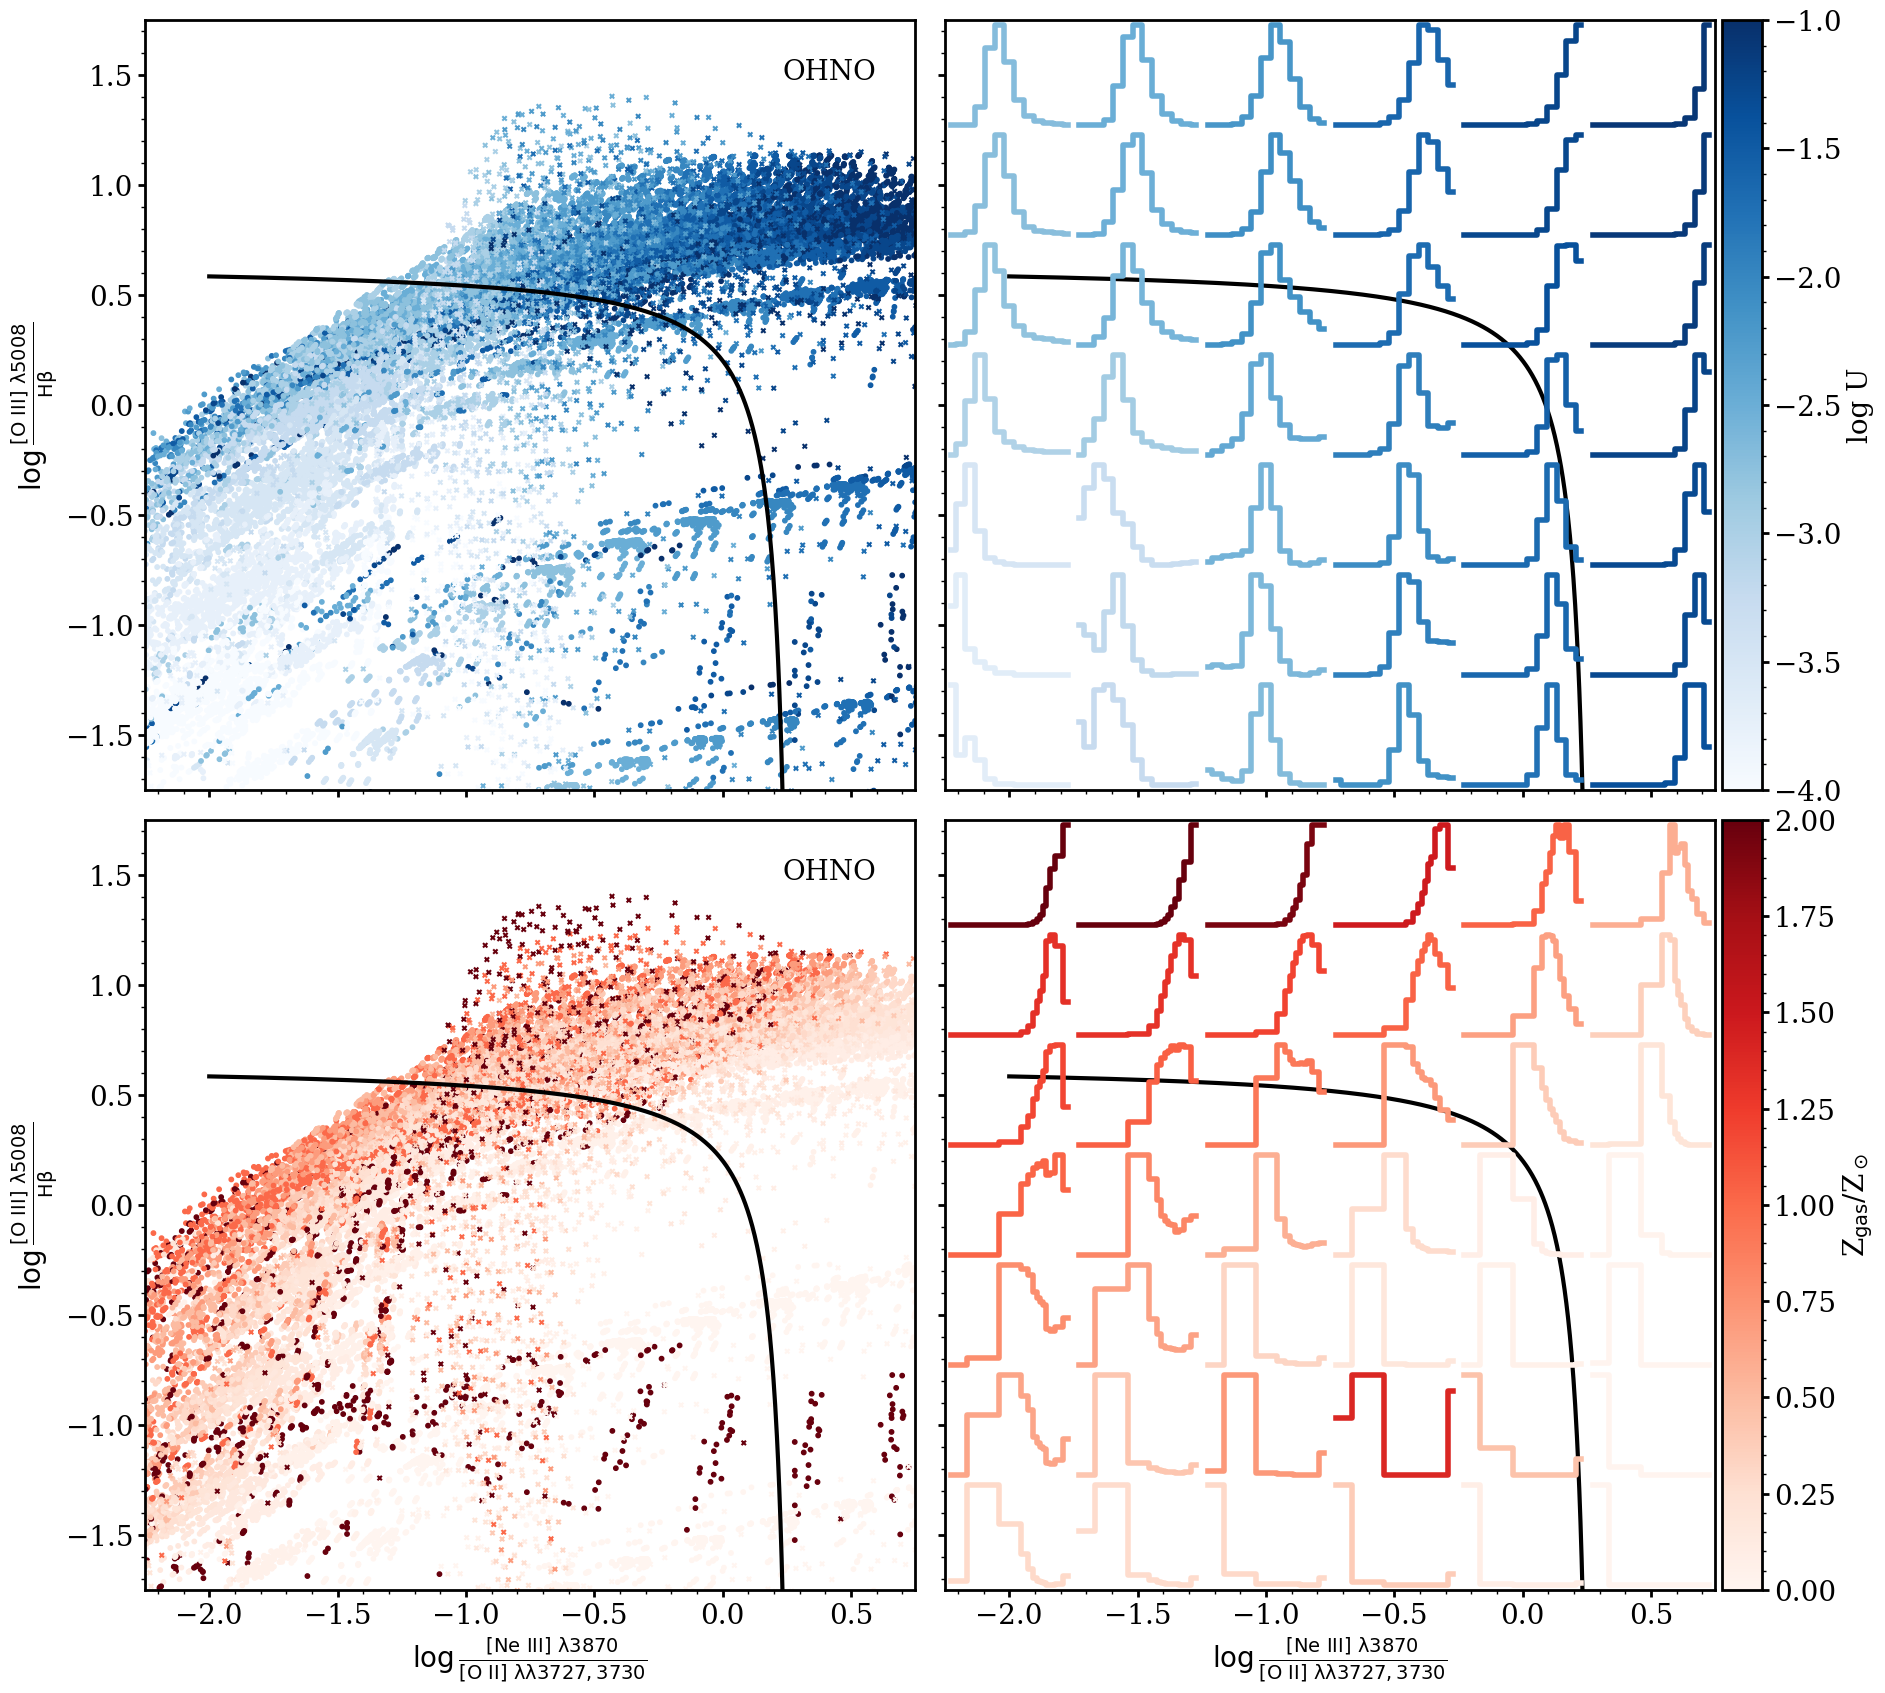

In [9]:
fig = plt.figure(figsize=(16,16), layout='tight')
subfigs = fig.subfigures(2, 2, wspace=0.0, hspace=0.0)

ax = subfigs[0,0].subplots(1,1)
ax.scatter(np.log10(BPASS_solar['Ne_3_3868.76A']/(BPASS_solar['O_2_3726.03A']+BPASS_solar['O_2_3728.81A'])), np.log10(BPASS_solar['O_3_5006.84A']/BPASS_solar['H_1_4861.33A']), 
           c=BPASS_solar['logU'], cmap='Blues', vmin=-4, vmax=-1, zorder=-9, s=10, rasterized=True)
ax.scatter(np.log10(AGN_solar['Ne_3_3868.76A']/(AGN_solar['O_2_3726.03A']+AGN_solar['O_2_3728.81A'])), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['logU'], cmap='Blues', vmin=-4, vmax=-1, marker='x', zorder=-9, s=10, rasterized=True)
xohno = np.linspace(-2,0.285, 1000)
ax.plot(xohno, diagnostic_lines.ohno_backhaus_2022(xohno), c='black', ls='-', lw=3, label='Backhaus et al. 2022', zorder=-9)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
ax.annotate('OHNO', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
ax.tick_params(labelbottom=False)

ax = subfigs[1,0].subplots(1,1)
ax.scatter(np.log10(BPASS_solar['Ne_3_3868.76A']/(BPASS_solar['O_2_3726.03A']+BPASS_solar['O_2_3728.81A'])), np.log10(BPASS_solar['O_3_5006.84A']/BPASS_solar['H_1_4861.33A']), 
           c=BPASS_solar['zgas'], cmap='Reds', vmin=0, vmax=2, zorder=-9, s=10, rasterized=True)
ax.scatter(np.log10(AGN_solar['Ne_3_3868.76A']/(AGN_solar['O_2_3726.03A']+AGN_solar['O_2_3728.81A'])), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['zgas'], cmap='Reds', vmin=0, vmax=2, marker='x', zorder=-9, s=10, rasterized=True)
xohno = np.linspace(-2,0.285, 1000)
ax.plot(xohno, diagnostic_lines.ohno_backhaus_2022(xohno), c='black', ls='-', lw=3, label='Backhaus et al. 2022', zorder=-9)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
ax.annotate('OHNO', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = subfigs[0,1].subplots(1,1)
xohno = np.linspace(-2,0.285, 1000)
ax.plot(xohno, diagnostic_lines.ohno_backhaus_2022(xohno), c='black', ls='-', lw=3, label='Backhaus et al. 2022', zorder=-9)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.tick_params(labelleft=False, labelbottom=False)

outer_grid = subfigs[0,1].add_gridspec(7, 6, wspace=0, hspace=0)
axs = outer_grid.subplots()
for (i, j), ax in np.ndenumerate(axs):
    neiii_oii_index = j
    oiii_hb_index = 6-i
    slice_condition = (ohno_groupby_logU['data_NeIII_OII'] == ohno_groupby_logU['data_NeIII_OII'].unique()[neiii_oii_index])&(ohno_groupby_logU['data_OIII_Hb'] == ohno_groupby_logU['data_OIII_Hb'].unique()[oiii_hb_index])
    slice_condition_color = (ohno_groupby['data_NeIII_OII'] == ohno_groupby_logU['data_NeIII_OII'].unique()[neiii_oii_index])&(ohno_groupby['data_OIII_Hb'] == ohno_groupby_logU['data_OIII_Hb'].unique()[oiii_hb_index])
    posterior_mean = ohno_groupby['likelihood_weighted_logU'][slice_condition_color]
    slice_color = plt.cm.Blues((posterior_mean+4)/3)
    ohno_point = ohno_groupby_logU[slice_condition]
    ax.step(ohno_point['logU'], ohno_point['likelihood_ohno_norm'], where='mid', lw=4, c=slice_color)
    ax.set(xticks=[], yticks=[])
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_facecolor('None')
    
ax = subfigs[0,1].add_axes([0.99, 0.019, 0.05, 0.9625])
cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', cmap='Blues', norm=mpl.colors.Normalize(vmin=-4, vmax=-1))
cb.set_label('log U')

ax = subfigs[1,1].subplots(1,1)
xohno = np.linspace(-2,0.285, 1000)
ax.plot(xohno, diagnostic_lines.ohno_backhaus_2022(xohno), c='black', ls='-', lw=3, label='Backhaus et al. 2022', zorder=-9)
ax.set_xlim(-2.25, 0.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
ax.tick_params(labelleft=False)

outer_grid = subfigs[1,1].add_gridspec(7, 6, wspace=0, hspace=0)
axs = outer_grid.subplots()
for (i, j), ax in np.ndenumerate(axs):
    neiii_oii_index = j
    oiii_hb_index = 6-i
    slice_condition = (ohno_groupby_zgas['data_NeIII_OII'] == ohno_groupby_zgas['data_NeIII_OII'].unique()[neiii_oii_index])&(ohno_groupby_zgas['data_OIII_Hb'] == ohno_groupby_zgas['data_OIII_Hb'].unique()[oiii_hb_index])
    slice_condition_color = (ohno_groupby['data_NeIII_OII'] == ohno_groupby_zgas['data_NeIII_OII'].unique()[neiii_oii_index])&(ohno_groupby['data_OIII_Hb'] == ohno_groupby_zgas['data_OIII_Hb'].unique()[oiii_hb_index])
    posterior_mean = ohno_groupby['likelihood_weighted_zgas'][slice_condition_color]
    slice_color = plt.cm.Reds(posterior_mean)
    ohno_point = ohno_groupby_zgas[slice_condition]
    ax.step(np.log10(ohno_point['zgas']), ohno_point['likelihood_ohno_norm'], where='mid', lw=4, c=slice_color)
    ax.set(xticks=[], yticks=[])
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_facecolor('None')

ax = subfigs[1,1].add_axes([0.99, 0.019, 0.05, 0.9625])
cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', cmap='Reds', norm=mpl.colors.Normalize(vmin=0, vmax=2))
cb.set_label(r'Z$_{\rm{gas}}$/Z$_\odot$')

plt.savefig('../figures/OHNO_logU_logZ.pdf', bbox_inches='tight')
plt.show()

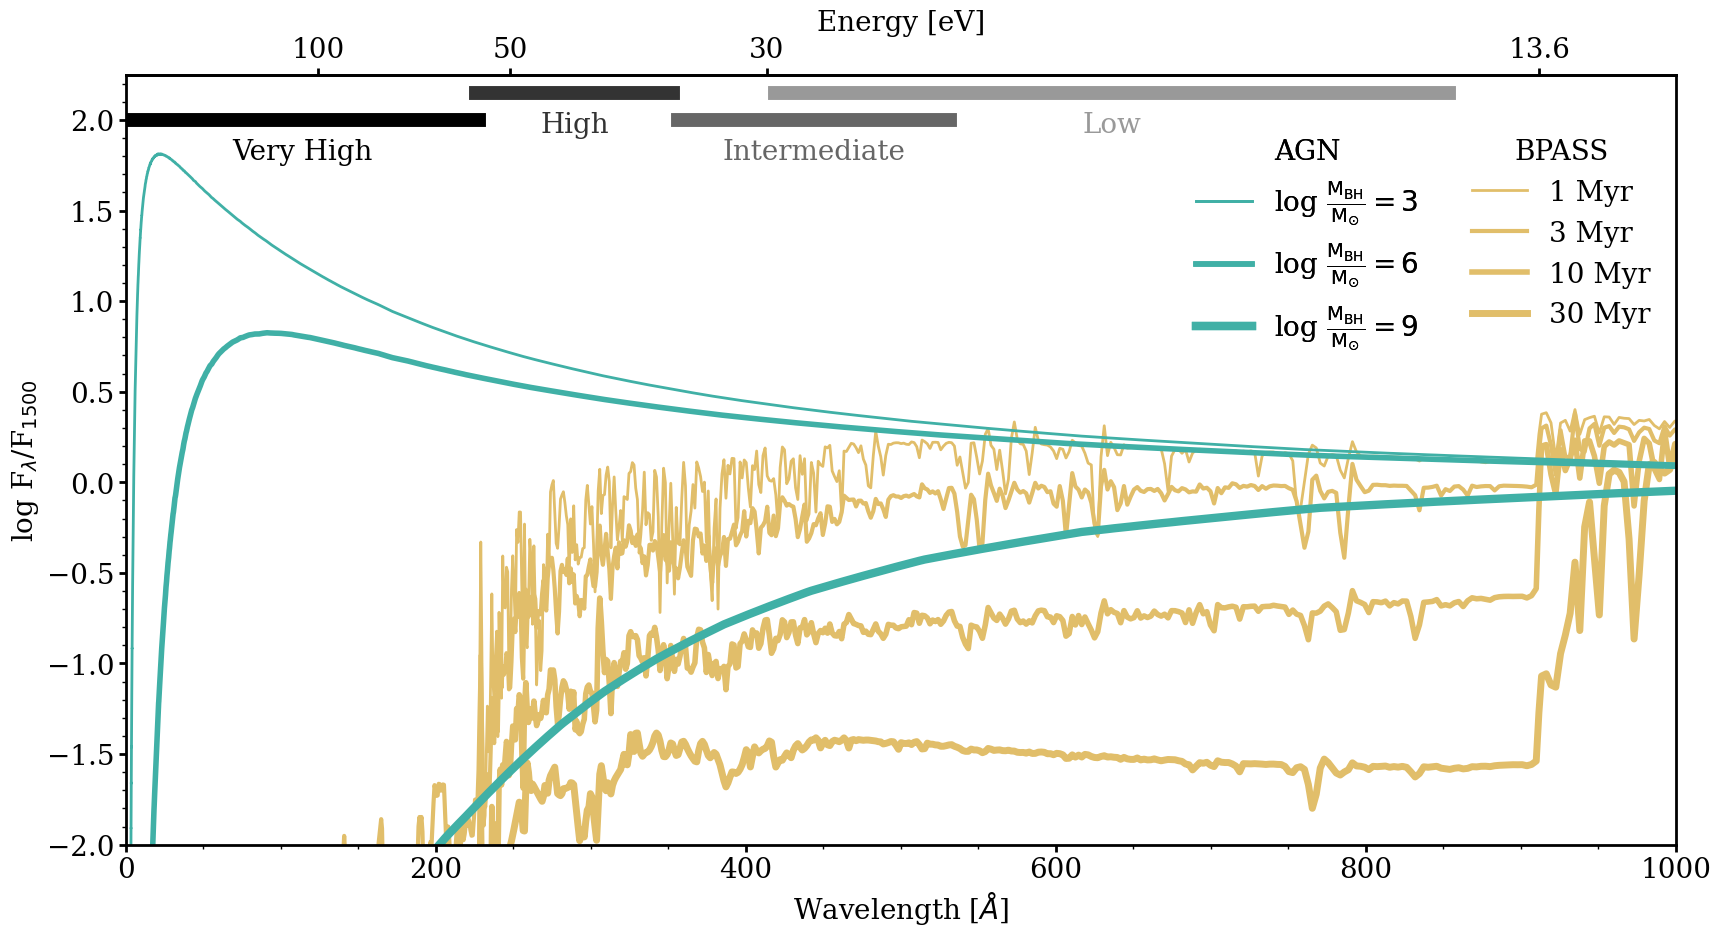

In [3]:
COLOR_LOW = (0.6, 0.6, 0.6)
COLOR_INTERMEDIATE = (0.4, 0.4, 0.4)
COLOR_HIGH = (0.2, 0.2, 0.2)
COLOR_VERY_HIGH = (0.0, 0.0, 0.0)

def clean_cloudy_con_file(filename):
    '''
    My method for making cloudy continuum files which are run on a single grid
    more user friendly. 
    '''
    df = pd.read_csv(filename, delimiter='\t+', comment='##')
    df = df.rename(columns={'#Cont  nu':'wave'})
    # df['step'] = np.zeros(len(df['wave']))
    # df['step'] = pd.qcut(df.index, int(len(df['wave'])/df['wave'].nunique()))
    # df['step'] = df['step'].cat.rename_categories(np.arange(0,len(df['step'].unique())))
    
    return df

def get_wavelength_from_ev(energy_eV):
    '''
    Takes photon energy in eV and returns corresponding wavelength in Angstroms
    '''
    return (const.h*const.c/(energy_eV*u.eV)).to(u.Angstrom).value

very_high_upper = get_wavelength_from_ev(54.42)
high_lower = get_wavelength_from_ev(54.93)
high_upper = get_wavelength_from_ev(35.11)
intermediate_lower = get_wavelength_from_ev(34.79)
intermediate_upper = get_wavelength_from_ev(23.33)
low_lower = get_wavelength_from_ev(29.60)
low_upper = get_wavelength_from_ev(14.53)
        

BPASS_135_300_single_hden3_path = "/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/BPASS/solar_abundances/hden3/BPASSv2.2.1_imf135_300_burst_single_models/"
model_library_path = '/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/'

path_string = f"{model_library_path}BPASS/solar_abundances/hden2/BPASSv2.2.1_imf135_300_burst_binary_models/sedBPASSv2.2.1_imf135_300_burst_binary.ascii_age6.0_zstar0.1_hden2_z0.1_logU-1.5.con"
df_star_60 = clean_cloudy_con_file(path_string)

path_string = f"{model_library_path}BPASS/solar_abundances/hden2/BPASSv2.2.1_imf135_300_burst_binary_models/sedBPASSv2.2.1_imf135_300_burst_binary.ascii_age6.5_zstar0.1_hden2_z0.1_logU-1.5.con"
df_star_65 = clean_cloudy_con_file(path_string)

path_string = f"{model_library_path}BPASS/solar_abundances/hden2/BPASSv2.2.1_imf135_300_burst_binary_models/sedBPASSv2.2.1_imf135_300_burst_binary.ascii_age7.0_zstar0.1_hden2_z0.1_logU-1.5.con"
df_star_70 = clean_cloudy_con_file(path_string)

path_string = f"{model_library_path}BPASS/solar_abundances/hden2/BPASSv2.2.1_imf135_300_burst_binary_models/sedBPASSv2.2.1_imf135_300_burst_binary.ascii_age7.5_zstar0.1_hden2_z0.1_logU-1.5.con"
df_star_75 = clean_cloudy_con_file(path_string)

path_string = '/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh3/sedmbh3_hden2_z0.1_logU-1.0.con'
df_agn_3 = clean_cloudy_con_file(path_string)

path_string = '/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh6/sedmbh6_hden2_z0.1_logU-1.0.con'
df_agn_6 = clean_cloudy_con_file(path_string)

path_string = '/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh9/sedmbh9_hden2_z0.1_logU-1.0.con'
df_agn_9 = clean_cloudy_con_file(path_string)

fig = plt.figure(figsize = (20 , 10))
gs = GridSpec(nrows=1, ncols=1)
gs.update(wspace=0, hspace=0)

ax = fig.add_subplot(gs[0:5, 0:10])
plt.plot(df_star_60.wave, np.log10(np.array(df_star_60['incident'])/df_star_60[df_star_60.wave == 1.50053e+03]['incident'].iloc[0]), color=COLOR_STARS, lw=2, label='1 Myr')
plt.plot(df_star_65.wave, np.log10(np.array(df_star_65['incident'])/df_star_65[df_star_65.wave == 1.50053e+03]['incident'].iloc[0]), color=COLOR_STARS, lw=3, label='3 Myr')
plt.plot(df_star_70.wave, np.log10(np.array(df_star_70['incident'])/df_star_70[df_star_70.wave == 1.50053e+03]['incident'].iloc[0]), color=COLOR_STARS, lw=4, label='10 Myr')
plt.plot(df_star_75.wave, np.log10(np.array(df_star_75['incident'])/df_star_75[df_star_75.wave == 1.50053e+03]['incident'].iloc[0]), color=COLOR_STARS, lw=5, label='30 Myr')
plt.plot(df_agn_3.wave, np.log10(np.array(df_agn_3['incident'])/df_agn_3[df_agn_3.wave == 1.50053e+03]['incident'].iloc[0]), color=COLOR_AGN, lw=2, label=r'log $\frac{\mathrm{M_{BH}}}{\mathrm{M}_{\odot}}=3$')
plt.plot(df_agn_6.wave, np.log10(np.array(df_agn_6['incident'])/df_agn_6[df_agn_6.wave == 1.50053e+03]['incident'].iloc[0]), color=COLOR_AGN, lw=4, label=r'log $\frac{\mathrm{M_{BH}}}{\mathrm{M}_{\odot}}=6$')
plt.plot(df_agn_9.wave, np.log10(np.array(df_agn_9['incident'])/df_agn_9[df_agn_9.wave == 1.50053e+03]['incident'].iloc[0]), color=COLOR_AGN, lw=6, label=r'log $\frac{\mathrm{M_{BH}}}{\mathrm{M}_{\odot}}=9$')

ax.annotate(f'Low', ((low_lower+low_upper)/2, 2.05), xycoords='data', ha='center', va='top', color=COLOR_LOW)
ax.annotate(f'Intermediate', ((intermediate_lower+intermediate_upper)/2, 1.9), xycoords='data', ha='center', va='top', color=COLOR_INTERMEDIATE)
ax.annotate(f'High', ((high_lower+high_upper)/2, 2.05), xycoords='data', ha='center', va='top', color=COLOR_HIGH)
ax.annotate(f'Very High', ((very_high_upper)/2, 1.9), xycoords='data', ha='center', va='top',  color=COLOR_VERY_HIGH)
ax.plot([low_lower, low_upper], [2.15, 2.15], color=COLOR_LOW, lw=10)
ax.plot([intermediate_lower, intermediate_upper], [2.0, 2.0], color=COLOR_INTERMEDIATE, lw=10)
ax.plot([high_lower, high_upper], [2.15, 2.15], color=COLOR_HIGH, lw=10)
ax.plot([0, very_high_upper], [2.0, 2.0], color=COLOR_VERY_HIGH, lw=10)

secax = ax.secondary_xaxis('top')
secax.set_xticks(get_wavelength_from_ev([13.6,30,50,100]))
secax.set_xticklabels([13.6,30,50,100])
secax.minorticks_off()
secax.set_xlabel('Energy [eV]')


# plt.legend(frameon=False, fontsize=20, ncols=2)
    
legend_elements_stars = [Line2D([0], [0], color=COLOR_STARS, lw=2, label='1 Myr'),
                         Line2D([0], [0], color=COLOR_STARS, lw=3, label='3 Myr'),
                         Line2D([0], [0], color=COLOR_STARS, lw=4, label='10 Myr'),
                         Line2D([0], [0], color=COLOR_STARS, lw=5, label='30 Myr')
                    ]     
legend_elements_agn = [Line2D([0], [0], color=COLOR_AGN, lw=2, label=r'log $\frac{\mathrm{M_{BH}}}{\mathrm{M}_{\odot}}=3$'),
                       Line2D([0], [0], color=COLOR_AGN, lw=4, label=r'log $\frac{\mathrm{M_{BH}}}{\mathrm{M}_{\odot}}=6$'),
                       Line2D([0], [0], color=COLOR_AGN, lw=6, label=r'log $\frac{\mathrm{M_{BH}}}{\mathrm{M}_{\odot}}=9$')
                    ]    
    
ax.add_artist(ax.legend(handles=legend_elements_stars, loc='upper right', bbox_to_anchor=(1.0, 0.95), frameon=False, title='BPASS'))
ax.add_artist(ax.legend(handles=legend_elements_agn, loc='upper right', bbox_to_anchor=(0.85, 0.95), frameon=False, title='AGN'))

plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('log F$_\lambda$/F$_{1500}$')
plt.xlim(0, 1000)
plt.ylim(-2, 2.25)

plt.savefig('../figures/example_seds.pdf', bbox_inches='tight')

plt.show()

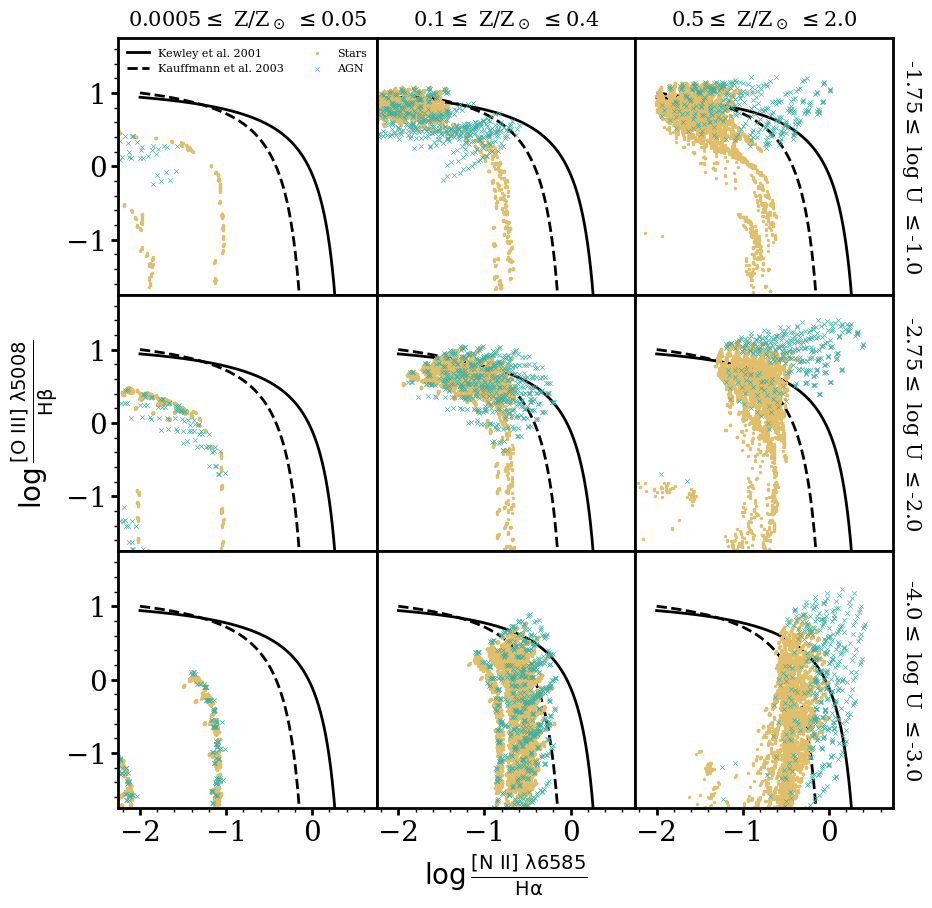

In [12]:
fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows=3, ncols=3)
gs.update(wspace=0.0, hspace=0.0)

logU_grid = [[-1.75, -1.5, -1.25, -1.0],
             [-2.75, -2.5, -2.25, -2.0], 
             [-4.0, -3.75, -3.5, -3.25, -3.0]
             ]
Z_grid = [[5.0e-04, 5.0e-03, 5.0e-02], 
          [1.0e-01, 1.5e-01, 2.0e-01, 2.5e-01, 3.0e-01, 4.0e-01], 
          [5.0e-01, 7.0e-01, 1.0e+00, 2.0e+00]]

for i, logU in enumerate(logU_grid):
    for j, Z in enumerate(Z_grid):

        subdf_bpass = BPASS_solar[(BPASS_solar.logU >= logU_grid[i][0])&((BPASS_solar.logU <= logU_grid[i][-1]))&(BPASS_solar.zgas >= Z_grid[j][0])&(BPASS_solar.zgas <= Z_grid[j][-1])]
        subdf_agn = AGN_solar[(AGN_solar.logU >= logU_grid[i][0])&((AGN_solar.logU <= logU_grid[i][-1]))&(AGN_solar.zgas >= Z_grid[j][0])&(AGN_solar.zgas <= Z_grid[j][-1])]

        ax = fig.add_subplot(gs[i:i+1, j:j+1])
        diagnostic_lines.plot_bpt_kewley_2001(ax, label=True, lw=2)
        diagnostic_lines.plot_bpt_kauffmann_2003(ax, label=True, lw=2)
        ax.scatter(np.log10(subdf_bpass['N_2_6583.45A']/subdf_bpass['H_1_6562.81A']), np.log10(subdf_bpass['O_3_5006.84A']/subdf_bpass['H_1_4861.33A']), 
                c=COLOR_STARS, alpha=1.0,  zorder=-9, s=2, label='Stars', rasterized=True)
        ax.scatter(np.log10(subdf_agn['N_2_6583.45A']/subdf_agn['H_1_6562.81A']), np.log10(subdf_agn['O_3_5006.84A']/subdf_agn['H_1_4861.33A']), 
                c=COLOR_AGN, marker='x', lw=0.5, alpha=1.0,  zorder=-9, s=10, label='AGN', rasterized=True)
        ax.set_xlim(-2.25, 0.75)
        ax.set_ylim(-1.75, 1.75)
        if i==0 and j==0:
            ax.legend(frameon=False, fontsize=8, ncols=2)
        if i==2 and j==1:
            ax.set_xlabel(r'$\log\frac{\rm{[N~II]~\lambda6585}}{\rm{H}\alpha}$')
        if i==1 and j==0:
            ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
        if j!=0:
            ax.tick_params(left=False,labelleft=False, which='both')
        if i == 0:
            ax.annotate(f'{Z_grid[j][0]}$\leq$ Z/Z$_\odot$ $\leq${Z_grid[j][-1]}', (0.5, 1.025), xycoords='axes fraction', ha='center', va='bottom', fontsize=15)
        if j == 2:
            ax.annotate(f'{logU_grid[i][0]}$\leq$ log U $\leq${logU_grid[i][-1]}', (1.025, 0.5), xycoords='axes fraction', ha='left', va='center', fontsize=15, rotation=270)

plt.savefig('../figures/bpt_grid.pdf', bbox_inches='tight')
plt.show()

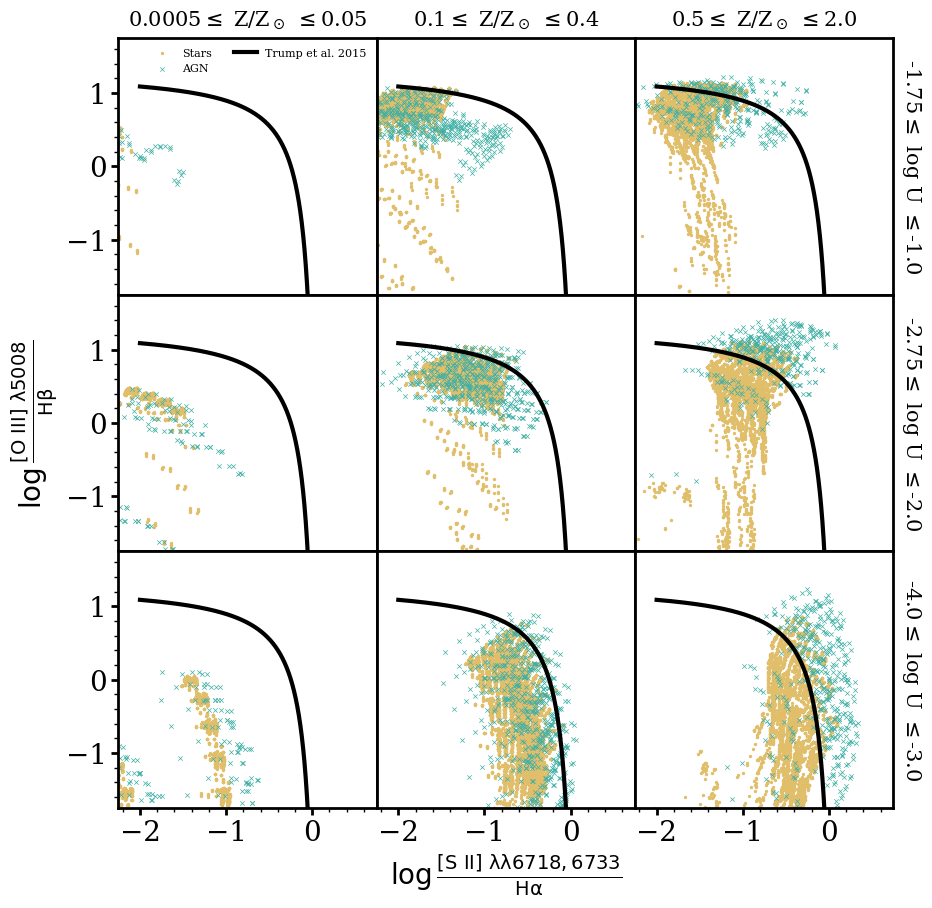

In [15]:
fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows=3, ncols=3)
gs.update(wspace=0.0, hspace=0.0)

logU_grid = [[-1.75, -1.5, -1.25, -1.0],
             [-2.75, -2.5, -2.25, -2.0], 
             [-4.0, -3.75, -3.5, -3.25, -3.0]
             ]
Z_grid = [[5.0e-04, 5.0e-03, 5.0e-02], 
          [1.0e-01, 1.5e-01, 2.0e-01, 2.5e-01, 3.0e-01, 4.0e-01], 
          [5.0e-01, 7.0e-01, 1.0e+00, 2.0e+00]]

for i, logU in enumerate(logU_grid):
    for j, Z in enumerate(Z_grid):

        subdf_bpass = BPASS_solar[(BPASS_solar.logU >= logU_grid[i][0])&((BPASS_solar.logU <= logU_grid[i][-1]))&(BPASS_solar.zgas >= Z_grid[j][0])&(BPASS_solar.zgas <= Z_grid[j][-1])]
        subdf_agn = AGN_solar[(AGN_solar.logU >= logU_grid[i][0])&((AGN_solar.logU <= logU_grid[i][-1]))&(AGN_solar.zgas >= Z_grid[j][0])&(AGN_solar.zgas <= Z_grid[j][-1])]

        ax = fig.add_subplot(gs[i:i+1, j:j+1])
        ax.scatter(np.log10((subdf_bpass['S_2_6716.44A']+subdf_bpass['S_2_6730.82A'])/subdf_bpass['H_1_6562.81A']), np.log10(subdf_bpass['O_3_5006.84A']/subdf_bpass['H_1_4861.33A']), 
           c=COLOR_STARS, alpha=1.0, label='Stars', zorder=-9, s=2, rasterized=True)
        ax.scatter(np.log10((subdf_agn['S_2_6716.44A']+subdf_agn['S_2_6730.82A'])/subdf_agn['H_1_6562.81A']), np.log10(subdf_agn['O_3_5006.84A']/subdf_agn['H_1_4861.33A']), 
                c=COLOR_AGN, marker='x', alpha=1.0, label='AGN', lw=0.5, zorder=-9, s=10, rasterized=True)
        diagnostic_lines.plot_vo87_trump_2015(ax)
        ax.set_xlim(-2.25, 0.75)
        ax.set_ylim(-1.75, 1.75)
        if i==0 and j==0:
            ax.legend(frameon=False, fontsize=8, ncols=2)
        if i==2 and j==1:
            ax.set_xlabel(r'$\log\frac{\rm{[S~II]}~\lambda\lambda6718,6733}{\rm{H}\alpha}$')
        if i==1 and j==0:
            ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
        if j!=0:
            ax.tick_params(left=False,labelleft=False, which='both')
        if i == 0:
            ax.annotate(f'{Z_grid[j][0]}$\leq$ Z/Z$_\odot$ $\leq${Z_grid[j][-1]}', (0.5, 1.025), xycoords='axes fraction', ha='center', va='bottom', fontsize=15)
        if j == 2:
            ax.annotate(f'{logU_grid[i][0]}$\leq$ log U $\leq${logU_grid[i][-1]}', (1.025, 0.5), xycoords='axes fraction', ha='left', va='center', fontsize=15, rotation=270)

plt.savefig('../figures/vo87_grid.pdf', bbox_inches='tight')
plt.show()

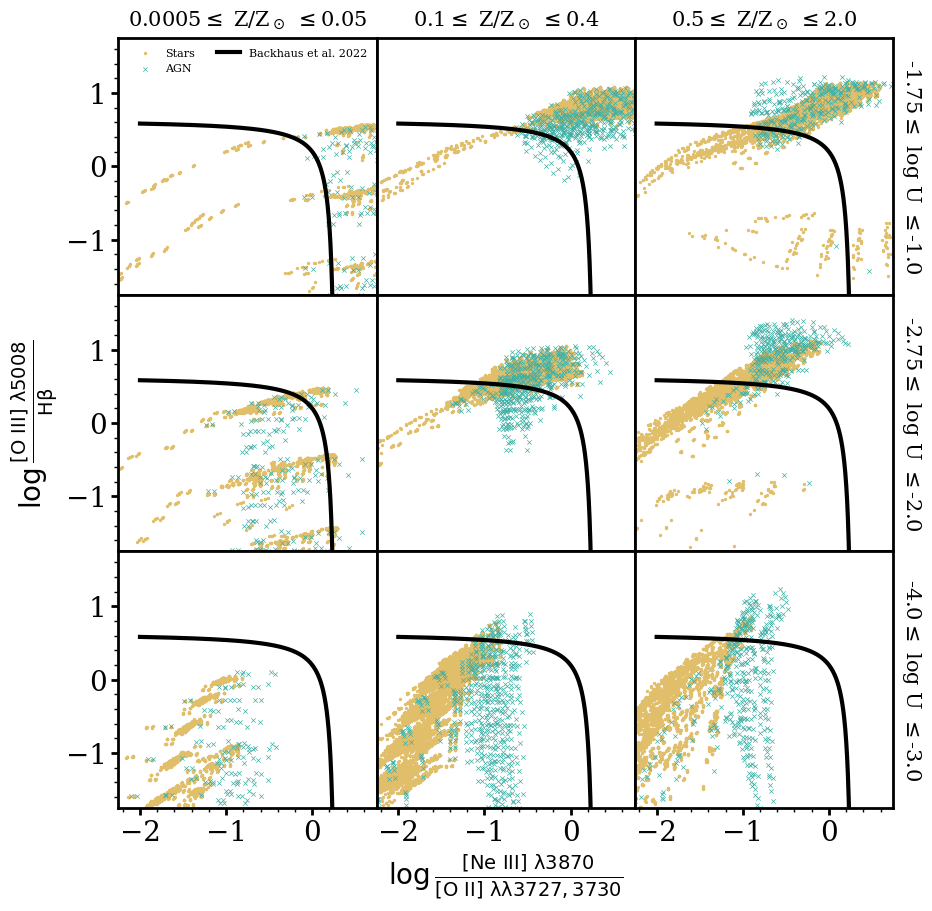

In [14]:
fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows=3, ncols=3)
gs.update(wspace=0.0, hspace=0.0)

logU_grid = [[-1.75, -1.5, -1.25, -1.0],
             [-2.75, -2.5, -2.25, -2.0], 
             [-4.0, -3.75, -3.5, -3.25, -3.0]
             ]
Z_grid = [[5.0e-04, 5.0e-03, 5.0e-02], 
          [1.0e-01, 1.5e-01, 2.0e-01, 2.5e-01, 3.0e-01, 4.0e-01], 
          [5.0e-01, 7.0e-01, 1.0e+00, 2.0e+00]]

for i, logU in enumerate(logU_grid):
    for j, Z in enumerate(Z_grid):

        subdf_bpass = BPASS_solar[(BPASS_solar.logU >= logU_grid[i][0])&((BPASS_solar.logU <= logU_grid[i][-1]))&(BPASS_solar.zgas >= Z_grid[j][0])&(BPASS_solar.zgas <= Z_grid[j][-1])]
        subdf_agn = AGN_solar[(AGN_solar.logU >= logU_grid[i][0])&((AGN_solar.logU <= logU_grid[i][-1]))&(AGN_solar.zgas >= Z_grid[j][0])&(AGN_solar.zgas <= Z_grid[j][-1])]

        ax = fig.add_subplot(gs[i:i+1, j:j+1])
        ax.scatter(np.log10(subdf_bpass['Ne_3_3868.76A']/(subdf_bpass['O_2_3726.03A']+subdf_bpass['O_2_3728.81A'])), np.log10(subdf_bpass['O_3_5006.84A']/subdf_bpass['H_1_4861.33A']), 
           c=COLOR_STARS, alpha=1.0, label='Stars', zorder=-9, s=2, rasterized=True)
        ax.scatter(np.log10(subdf_agn['Ne_3_3868.76A']/(subdf_agn['O_2_3726.03A']+subdf_agn['O_2_3728.81A'])), np.log10(subdf_agn['O_3_5006.84A']/subdf_agn['H_1_4861.33A']), 
                c=COLOR_AGN, marker='x', alpha=1.0, label='AGN', lw=0.5, zorder=-9, s=10, rasterized=True)
        diagnostic_lines.plot_ohno_backhaus_2022(ax)
        ax.set_xlim(-2.25, 0.75)
        ax.set_ylim(-1.75, 1.75)
        if i==0 and j==0:
            ax.legend(frameon=False, fontsize=8, ncols=2)
        if i==2 and j==1:
            ax.set_xlabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
        if i==1 and j==0:
            ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
        if j!=0:
            ax.tick_params(left=False,labelleft=False, which='both')
        if i == 0:
            ax.annotate(f'{Z_grid[j][0]}$\leq$ Z/Z$_\odot$ $\leq${Z_grid[j][-1]}', (0.5, 1.025), xycoords='axes fraction', ha='center', va='bottom', fontsize=15)
        if j == 2:
            ax.annotate(f'{logU_grid[i][0]}$\leq$ log U $\leq${logU_grid[i][-1]}', (1.025, 0.5), xycoords='axes fraction', ha='left', va='center', fontsize=15, rotation=270)

plt.savefig('../figures/ohno_grid.pdf', bbox_inches='tight')
plt.show()

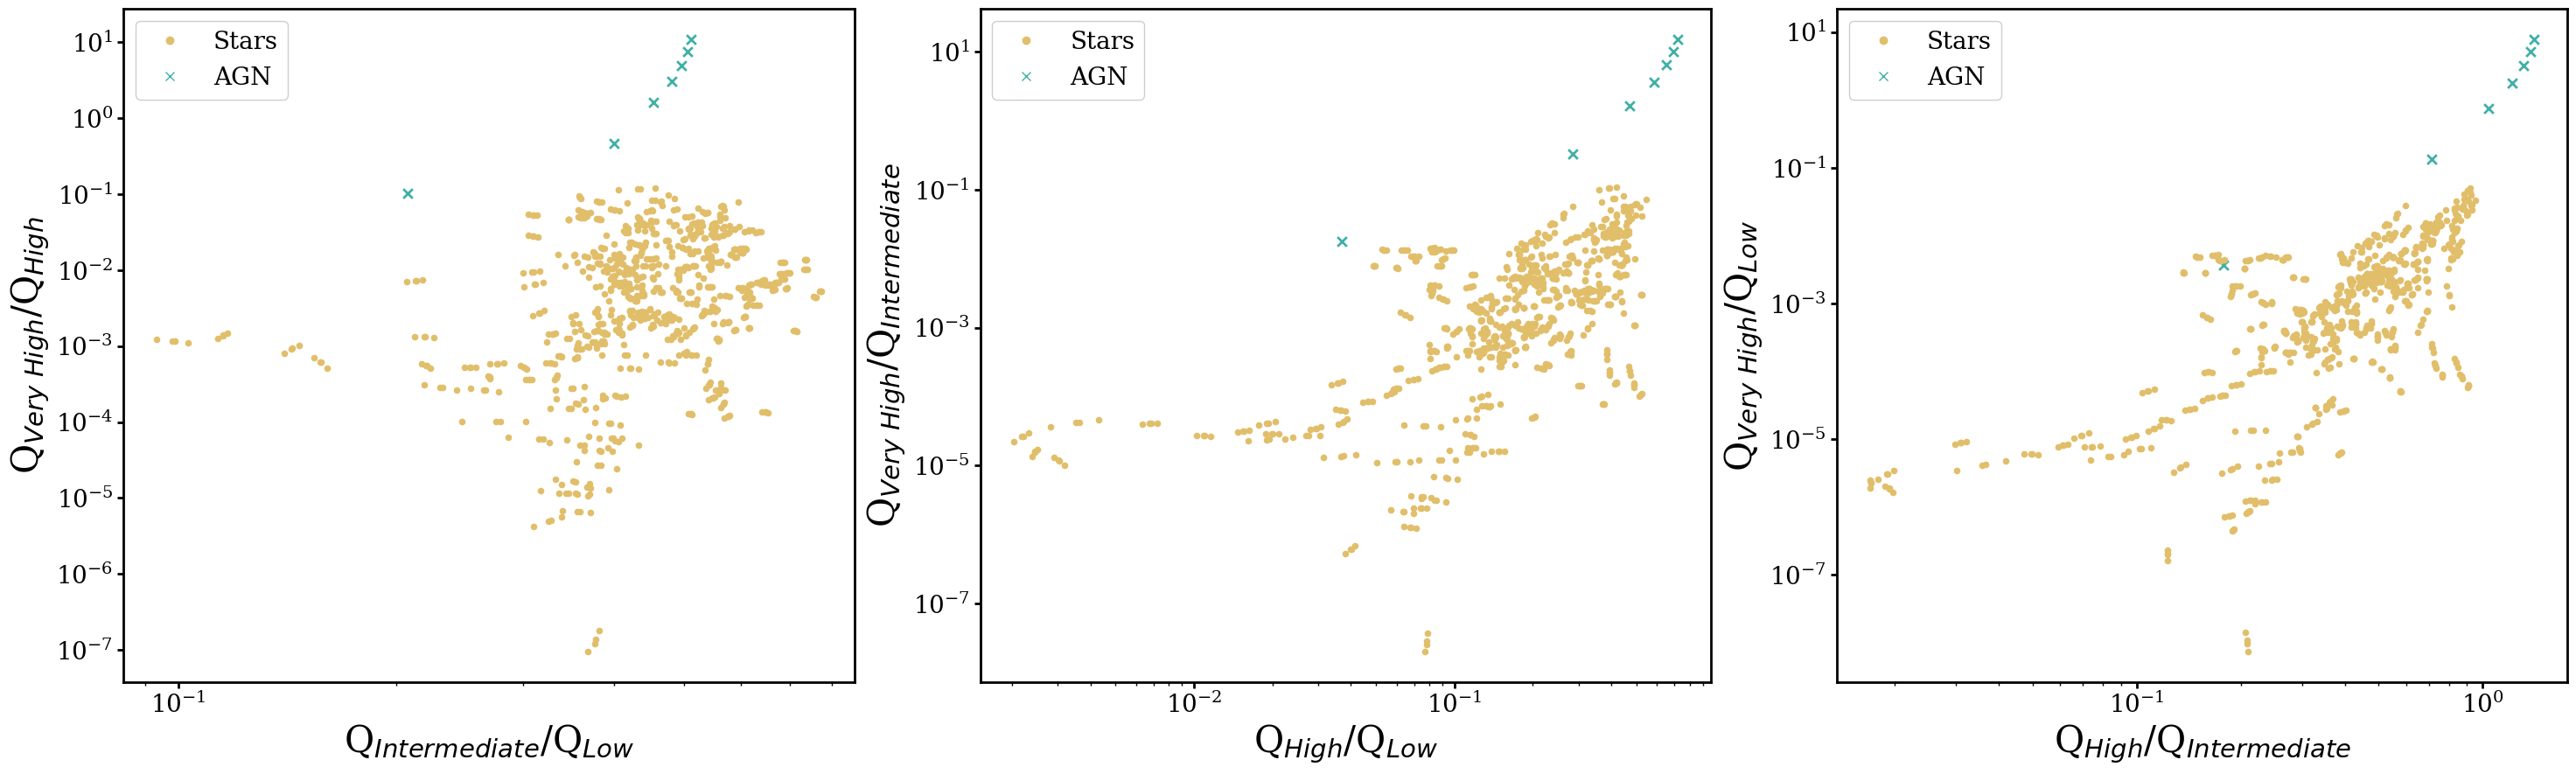

In [23]:
def format_bpass_sed(path):
    df = pd.read_csv(path, delimiter='\s+', header=None) 
    df.columns = (df.columns-1)/10 + 6
    df = df.rename(columns = {5.9:'wavelength'})
    return(df)

def generate_ionization_zone_integrals(seds):
    sed_integrals = pd.DataFrame(index=['total', 'low', 'intermediate', 'high', 'very_high'])

    ages = np.round(np.arange(6, 11.1, 0.1), decimals=1)
    for age in ages: 

        x_total = seds['wavelength'][seds.wavelength < 912]
        y_total = seds[age][seds.wavelength < 912]
        x_low = seds['wavelength'][(seds.wavelength > low_lower)&(seds.wavelength < low_upper)]
        y_low = seds[age][(seds.wavelength > low_lower)&(seds.wavelength < low_upper)]
        x_intermediate = seds['wavelength'][(seds.wavelength > intermediate_lower)&(seds.wavelength < intermediate_upper)]
        y_intermediate = seds[age][(seds.wavelength > intermediate_lower)&(seds.wavelength < intermediate_upper)]
        x_high = seds['wavelength'][(seds.wavelength > high_lower)&(seds.wavelength < high_upper)]
        y_high = seds[age][(seds.wavelength > high_lower)&(seds.wavelength < high_upper)]
        x_very_high = seds['wavelength'][(seds.wavelength < very_high_upper)]
        y_very_high = seds[age][(seds.wavelength < very_high_upper)]

        integral_total = integrate.trapezoid(y_total, x=x_total)
        integral_low = integrate.trapezoid(y_low, x=x_low)
        integral_intermediate = integrate.trapezoid(y_intermediate, x=x_intermediate)
        integral_high = integrate.trapezoid(y_high, x=x_high)
        integral_very_high = integrate.trapezoid(y_very_high, x=x_very_high)

        sed_integrals[age] = {
            'total':integral_total,
            'low':integral_low, 
            'intermediate':integral_intermediate,
            'high':integral_high,
            'very_high':integral_very_high
        }

    return sed_integrals

def generate_ionization_zone_integrals_mbh(seds):
    sed_integrals = pd.DataFrame(index=['total', 'low', 'intermediate', 'high', 'very_high'])

    mbhs = [3,4,5,6,7,8,9]
    for mbh in mbhs: 

        x_total = seds['wavelength'][seds.wavelength < 912]
        y_total = seds[mbh][seds.wavelength < 912]
        x_low = seds['wavelength'][(seds.wavelength > low_lower)&(seds.wavelength < low_upper)]
        y_low = seds[mbh][(seds.wavelength > low_lower)&(seds.wavelength < low_upper)]
        x_intermediate = seds['wavelength'][(seds.wavelength > intermediate_lower)&(seds.wavelength < intermediate_upper)]
        y_intermediate = seds[mbh][(seds.wavelength > intermediate_lower)&(seds.wavelength < intermediate_upper)]
        x_high = seds['wavelength'][(seds.wavelength > high_lower)&(seds.wavelength < high_upper)]
        y_high = seds[mbh][(seds.wavelength > high_lower)&(seds.wavelength < high_upper)]
        x_very_high = seds['wavelength'][(seds.wavelength < very_high_upper)]
        y_very_high = seds[mbh][(seds.wavelength < very_high_upper)]

        integral_total = integrate.trapezoid(y_total, x=x_total)
        integral_low = integrate.trapezoid(y_low, x=x_low)
        integral_intermediate = integrate.trapezoid(y_intermediate, x=x_intermediate)
        integral_high = integrate.trapezoid(y_high, x=x_high)
        integral_very_high = integrate.trapezoid(y_very_high, x=x_very_high)

        sed_integrals[mbh] = {
            'total':integral_total,
            'low':integral_low, 
            'intermediate':integral_intermediate,
            'high':integral_high,
            'very_high':integral_very_high
        }

    return -1*sed_integrals
# BPASS_seds = '/Users/njc5787/Research/BPASSv2.2.1_release-07-18-Tuatara/seds_300/bpass_v2.2.1_imf135_300/'

Z_ALL = ['em5', 'em4', '001', '002', '003', '004', '006', '008', '010', '014', '020', '040']
imfs_all = ['100_300', '135_300', '170_300', '_chab300']

z_size = np.linspace(10, 300, len(Z_ALL))
for z in Z_ALL:
    bpass_df = format_bpass_sed(BPASS_seds+f'spectra-bin-imf135_300.z{z}.dat')
    integrals_df = generate_ionization_zone_integrals(seds=bpass_df)

AGN_SEDs = '/Users/njc5787/Research/cloudy_modeling/agn_seds/'
mbhs = [3,4,5,6,7,8,9]
mbh_seds = pd.DataFrame()
for mbh in mbhs:
    df = pd.read_csv(AGN_SEDs+f'mbh{mbh}.txt', sep='\t+', names=['nu', 'nuFnu', 'other']).drop(0, axis=0).drop('other', axis=1).astype(float)
    mbh_seds[mbh] = df['nuFnu']
mbh_seds['wavelength'] = 2.99792e18/df['nu']
mbh_integrals = generate_ionization_zone_integrals_mbh(mbh_seds)

fig = plt.figure(figsize = (38 , 10))
gs = GridSpec(nrows=10, ncols=40)
gs.update(wspace=10, hspace=0)

ax0 = fig.add_subplot(gs[0:10, 0:12])
ax0.scatter(mbh_integrals.loc['intermediate']/mbh_integrals.loc['low'], mbh_integrals.loc['very_high']/mbh_integrals.loc['high'], c=COLOR_AGN, marker='x', lw=2, s=60, rasterized=True)
# ax0.axis([1e-1,1e0,1e-5,5e1])
ax0.set_xlabel('Q$_{Intermediate}$/Q$_{Low}$', fontsize=30)
ax0.set_ylabel('Q$_{Very~High}$/Q$_{High}$', fontsize=30)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.tick_params(left=False, which='minor')


ax1 = fig.add_subplot(gs[0:10, 13:25])
ax1.scatter(mbh_integrals.loc['high']/mbh_integrals.loc['low'], mbh_integrals.loc['very_high']/mbh_integrals.loc['intermediate'], c=COLOR_AGN, marker='x', lw=2, s=60, rasterized=True)
# ax1.axis([5e-3,3e0,1e-5,5e1])
ax1.set_xlabel('Q$_{High}$/Q$_{Low}$', fontsize=30)
ax1.set_ylabel('Q$_{Very~High}$/Q$_{Intermediate}$', fontsize=30)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(left=True, which='both')


ax2 = fig.add_subplot(gs[0:10, 26:38])
ax2.scatter(mbh_integrals.loc['high']/mbh_integrals.loc['intermediate'], mbh_integrals.loc['very_high']/mbh_integrals.loc['low'], c=COLOR_AGN, marker='x', lw=2, s=60, rasterized=True)
ax2.set_xlabel('Q$_{High}$/Q$_{Intermediate}$', fontsize=30)
ax2.set_ylabel('Q$_{Very~High}$/Q$_{Low}$', fontsize=30)
# ax2.axis([5e-2,3e0,1e-5,5e1])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.tick_params(left=True, which='both')

for imf in imfs_all:
    for i,z in enumerate(Z_ALL):
        bpass_df = format_bpass_sed(f'/Users/njc5787/Research/BPASSv2.2.1_release-07-18-Tuatara/seds_300/bpass_v2.2.1_imf{imf}/spectra-bin-imf{imf}.z{z}.dat')
        integrals_df = generate_ionization_zone_integrals(seds=bpass_df)
        agelessthan8df = integrals_df.drop(integrals_df.columns[20:], axis=1).copy()
        y = ax0.scatter(agelessthan8df.loc['intermediate']/agelessthan8df.loc['low'], agelessthan8df.loc['very_high']/agelessthan8df.loc['high'], c=COLOR_STARS, s=20, rasterized=True)
        ax1.scatter(agelessthan8df.loc['high']/agelessthan8df.loc['low'], agelessthan8df.loc['very_high']/agelessthan8df.loc['intermediate'], c=COLOR_STARS, s=20, rasterized=True)
        ax2.scatter(agelessthan8df.loc['high']/agelessthan8df.loc['intermediate'], agelessthan8df.loc['very_high']/agelessthan8df.loc['low'], c=COLOR_STARS, s=20, rasterized=True)

legend_elements_points = [Line2D([0], [0], marker='o', color='none', label='Stars', markerfacecolor=COLOR_STARS, markeredgecolor='None', markersize=np.sqrt(50)),
                    Line2D([0], [0], marker='x', lw=2, color='none', label='AGN', markerfacecolor=COLOR_AGN, markeredgecolor=COLOR_AGN, markersize=np.sqrt(50)),
                    ]    
    
ax0.legend(handles=legend_elements_points, loc='upper left', framealpha=0.95)
ax1.legend(handles=legend_elements_points, loc='upper left', framealpha=0.95)
ax2.legend(handles=legend_elements_points, loc='upper left', framealpha=0.95)

# ax = fig.add_subplot(gs[0:10,38:40])
# fig.colorbar(y,ax,use_gridspec=True, label='log age/years')

plt.savefig('../figures/Qthreepanel.pdf')

plt.show()